In [1]:
import matplotlib.pyplot as plt

import numpy as np


X = np.load('../Language_digits/X.npy')
Y = np.load('../Language_digits/Y.npy')

X.shape
X
Y.shape
Y


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [2]:
X = np.array(X)
Y = np.array(Y)
print("Shape of train :", X.shape)
print("Shape of label :", Y.shape)

Shape of train : (2062, 64, 64)
Shape of label : (2062, 10)


In [3]:
def plot_digits_colidx(X, Y):
    plt.figure(figsize=(10,10))
    plt.plot([5, 2, 11])
    for i in col_idx:
        ax = plt.subplot(5, 2, i+1)
        ax.set_title("Column_idx: " + str(i))
        plt.axis('off')
        plt.imshow(X[np.argwhere(Y[:,i]==1)[0][0],:])

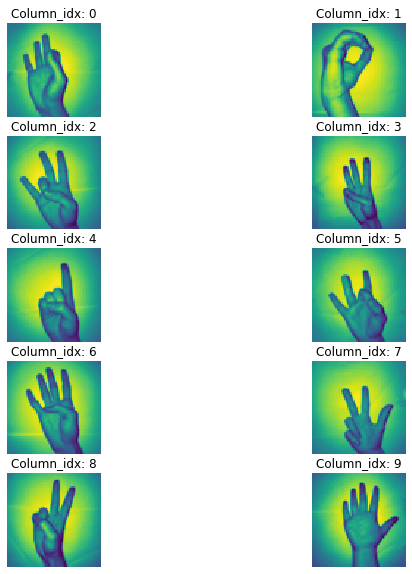

In [4]:
N_classes = Y.shape[1]
col_idx = [i for i in range(N_classes)]
plot_digits_colidx(X, Y)

In [5]:
#dictionary that handles the column index - digit relatinship
colidx_digit = {0: 9,
                1: 0,
                2: 7,
                3: 6,
                4: 1,
                5: 8,
                6: 4,
                7: 3,
                8: 2,
                9: 5}

#digit - column index relationship dictionary
digit_colidx = {v: k for k, v in colidx_digit.items()}

In [6]:
#create empty matrix
Y_ordered = np.zeros(Y.shape)
#fill the matrix so that the columns index also corresponds to the digit
for i in range(N_classes):
    Y_ordered[:, i] = Y[:, digit_colidx[i]]

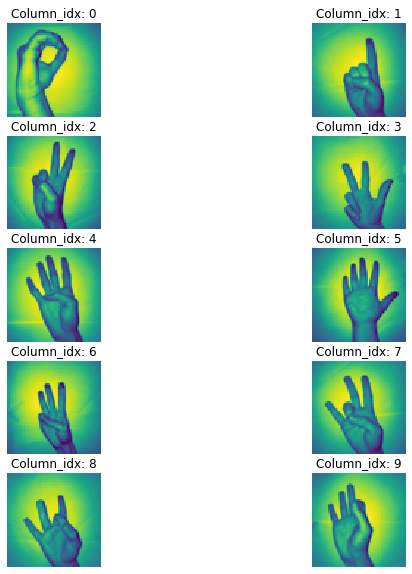

In [7]:
plot_digits_colidx(X, Y_ordered)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,Y_ordered, test_size=0.2, random_state=42)

In [9]:
X_train = np.expand_dims(X_train, axis=3)
X_val = np.expand_dims(X_val, axis=3)
print(X_train.shape)
print(X_val.shape)

(1649, 64, 64, 1)
(413, 64, 64, 1)


In [10]:
#Reshape from grayscale to RGB
X_train_empty = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2], 3])
X_train_empty[..., :] = X_train[..., :]
X_train = X_train_empty
X_train[10,6,5,:]

X_val_empty = np.empty([X_val.shape[0], X_val.shape[1], X_val.shape[2], 3])
X_val_empty[..., :] = X_val[..., :]
X_val = X_val_empty
X_val[10,6,5,:]

array([0.67843139, 0.67843139, 0.67843139])

In [11]:
X_val.shape

(413, 64, 64, 3)

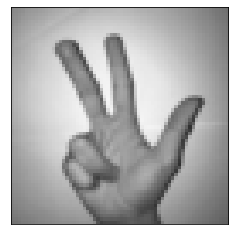

In [12]:
plt.imshow(X_train[10]);
plt.xticks([]), plt.yticks([]);

## Pre-trained model MobileNet - Transfer Learning

In [13]:
from keras.applications.mobilenet import MobileNet
model = MobileNet()
print(model.summary())

Using TensorFlow backend.
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseC

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

model = Sequential()
model.add(MobileNet(input_shape=(64,64,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [18]:
#callbacks = [EarlyStopping(monitor='val_acc', patience=10)]
history = model.fit(X_train, y_train, 
          batch_size=X_train.shape[0], epochs=25, validation_data=(X_val, y_val))#callbacks=callbacks)


Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/25
1649/1649 [==============================] - 82s 49ms/step - loss: 4.0245 - acc: 0.1043 - val_loss: 3.2689 - val_acc: 0.3729
Epoch 2/25
1649/1649 [==============================] - 80s 48ms/step - loss: 1.3285 - acc: 0.6192 - val_loss: 1.7056 - val_acc: 0.6150
Epoch 3/25
1649/1649 [==============================] - 78s 47ms/step - loss: 0.3534 - acc: 0.8793 - val_loss: 1.3248 - val_acc: 0.6998
Epoch 4/25
1649/1649 [==============================] - 77s 47ms/step - loss: 0.0942 - acc: 0.9715 - val_loss: 1.1435 - val_acc: 0.7554
Epoch 5/25
1649/1649 [==============================] - 77s 46ms/step - loss: 0.0376 - acc: 0.9933 - val_loss: 1.0345 - val_acc: 0.7869
Epoch 6/25
1649/1649 [==============================] - 76s 46ms/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.9605 - val_acc: 0.8039
Epoch 7/25
1649/1649 [==============================] - 77s 47ms/step - loss: 0.0086 - ac

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40970     
Total params: 3,269,834
Trainable params: 3,247,946
Non-trainable params: 21,888
_________________________________________________________________


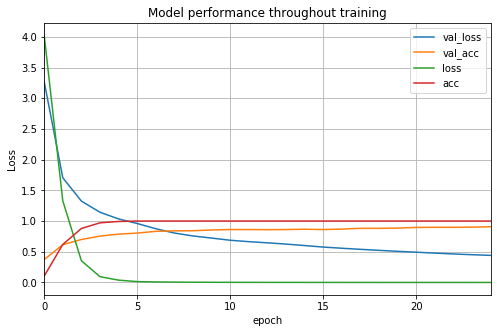

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
prediction = model.predict(X_val)
print(np.argmax(prediction, axis=1))

[8 6 7 0 2 8 3 6 3 4 3 6 3 0 8 2 7 7 3 6 8 5 7 4 5 2 5 7 4 2 2 5 1 2 5 2 7
 3 1 4 9 7 6 2 8 5 3 8 3 1 0 9 3 0 8 5 3 5 8 8 7 3 1 2 4 1 9 8 4 7 7 7 2 3
 8 2 0 4 2 9 6 2 0 1 2 4 1 6 2 4 0 0 6 3 3 5 5 2 4 3 3 4 2 4 1 6 0 0 1 4 9
 5 7 7 8 6 1 3 5 9 1 1 3 6 6 6 9 9 8 1 6 7 3 7 6 9 3 8 3 9 5 5 5 2 2 5 1 6
 8 0 8 9 1 2 3 5 2 4 3 7 8 0 9 3 0 7 3 3 4 0 6 0 2 7 4 1 0 3 5 2 4 7 7 5 1
 3 5 9 7 9 2 7 8 0 4 1 8 0 1 8 5 0 1 5 4 8 7 4 8 8 1 9 8 5 0 6 5 7 3 2 0 4
 1 3 6 1 1 4 6 5 1 6 3 9 6 5 3 5 6 3 1 0 2 9 4 0 3 5 8 5 6 9 1 4 8 3 7 5 8
 2 3 2 1 4 1 4 4 8 8 9 9 7 3 2 5 0 7 5 7 8 8 5 9 9 5 9 0 9 9 3 2 3 0 7 5 9
 5 6 2 3 3 0 0 6 6 0 9 7 6 3 9 4 3 7 3 0 0 9 4 5 8 1 8 8 3 4 8 4 8 5 6 0 0
 0 0 7 7 5 0 5 7 9 7 0 3 9 0 7 1 1 4 6 8 0 2 3 8 3 9 8 3 6 6 5 5 3 2 7 8 5
 0 4 7 5 7 7 3 5 5 7 2 1 2 9 9 9 8 1 1 6 5 4 3 4 9 0 0 0 3 9 7 2 5 6 9 0 1
 8 4 2 8 4 7]


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_class = y_val.argmax(axis=1)
y_pred_class = prediction.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy:',accuracy_score(y_train_class, y_pred_class))

### Accuracy : 0.95

## Test with freezing and learning only on the dense

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

pretrained_model = MobileNet(input_shape=(64,64,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
for layer in pretrained_model.layers:
    layer.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)] #stop when the accuracy get stable

C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, 
          batch_size=X_train.shape[1], epochs=10, validation_data=(X_val, y_val))

Train on 1649 samples, validate on 413 samples
Epoch 1/10
1649/1649 [==============================] - 23s 14ms/step - loss: 3.9560 - acc: 0.0958 - val_loss: 4.0223 - val_acc: 0.1550
Epoch 2/10
1649/1649 [==============================] - 20s 12ms/step - loss: 3.3436 - acc: 0.1637 - val_loss: 3.8339 - val_acc: 0.1671
Epoch 3/10
1649/1649 [==============================] - 20s 12ms/step - loss: 2.3693 - acc: 0.3305 - val_loss: 3.4652 - val_acc: 0.1768
Epoch 4/10
1649/1649 [==============================] - 20s 12ms/step - loss: 1.8263 - acc: 0.4542 - val_loss: 3.1214 - val_acc: 0.2082
Epoch 5/10
1649/1649 [==============================] - 20s 12ms/step - loss: 1.5429 - acc: 0.5209 - val_loss: 2.9812 - val_acc: 0.2252
Epoch 6/10
1649/1649 [==============================] - 21s 13ms/step - loss: 1.3268 - acc: 0.5864 - val_loss: 2.9696 - val_acc: 0.2470
Epoch 7/10
1649/1649 [==============================] - 21s 12ms/step - loss: 1.1139 - acc: 0.6489 - val_loss: 2.9905 - val_acc: 0.2542
E

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40970     
Total params: 3,269,834
Trainable params: 40,970
Non-trainable params: 3,228,864
_________________________________________________________________


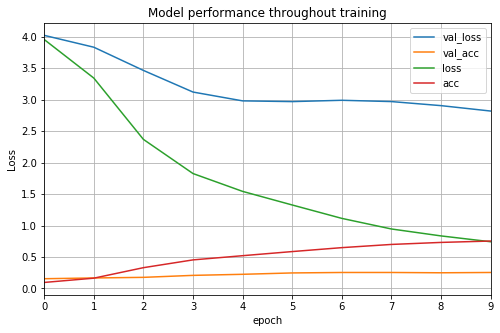

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
prediction = model.predict(X_val)
print(np.argmax(prediction, axis=1))

[1 9 7 1 1 2 9 6 1 4 1 7 1 0 1 2 7 9 9 1 1 5 1 4 9 1 9 9 7 1 1 9 1 1 5 2 9
 4 1 8 1 4 1 1 1 2 1 1 1 1 9 9 7 0 1 4 9 9 1 1 9 1 1 9 7 1 1 1 4 9 9 1 1 9
 9 2 1 1 1 1 6 1 0 1 2 9 1 1 1 4 2 1 7 9 9 1 7 2 4 9 9 4 1 6 1 1 1 1 1 1 1
 5 9 7 6 1 1 1 1 9 1 1 1 9 7 2 1 9 9 1 4 7 1 4 6 1 7 1 1 9 5 7 9 1 3 9 1 7
 1 1 1 1 1 9 9 7 1 9 1 9 1 1 1 1 1 1 1 9 9 1 1 1 1 9 4 1 1 9 7 1 9 9 1 5 1
 1 9 1 1 7 1 1 1 1 4 1 7 6 1 9 5 0 1 1 6 1 1 1 1 9 1 1 1 9 7 6 4 6 7 1 1 1
 1 7 1 1 1 4 1 6 1 7 9 9 2 5 9 5 2 1 1 1 9 7 4 0 1 9 1 5 6 1 1 4 9 9 9 5 1
 1 1 1 1 1 1 4 9 1 1 1 1 1 9 2 2 1 1 5 1 6 1 5 1 1 1 9 1 1 1 1 1 1 1 7 9 6
 9 1 2 9 1 1 1 4 1 0 1 2 2 1 1 7 1 9 9 1 1 9 1 9 1 1 1 1 2 1 1 4 6 9 6 1 2
 1 1 9 7 5 1 4 1 1 1 0 9 1 1 9 1 1 9 6 1 1 2 2 1 9 1 1 9 2 1 9 5 9 1 6 1 6
 1 4 1 5 9 7 1 4 9 1 7 1 1 1 1 2 1 1 1 1 5 1 9 1 1 1 0 1 9 1 2 1 7 9 2 9 1
 1 4 1 1 4 1]


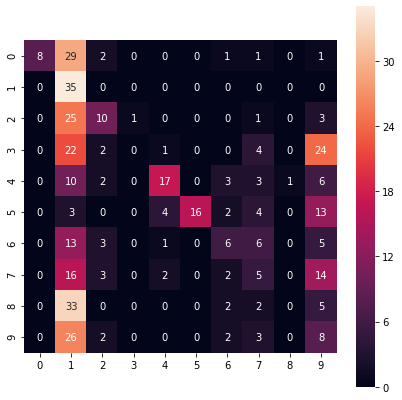

Accuracy: 0.2542372881355932


In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_class = y_val.argmax(axis=1)
y_pred_class = prediction.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy:',accuracy_score(y_train_class, y_pred_class))

### Accuracy : 0.25

## FFN Feature Fusion Network

In [16]:
import tensorflow as tf
from keras.models import Sequential

pretrained_model = MobileNet(input_shape=(64,64,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

for layer in pretrained_model.layers:
    layer.trainable = False

#Take only the first 41 layers
model = Sequential()
for i in range(41):
    model.add(pretrained_model.layers[i])
    
pretrained_model = model

In [17]:
X_train_pretrained_features = pretrained_model.predict(X_train)
X_train_pretrained_features.shape

(1649, 4, 4, 256)

In [18]:
X_val_pretrained_features = pretrained_model.predict(X_val)

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)

model = Sequential()
model.add(Dense(10, input_shape=X_train_pretrained_features.shape[1:]))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

from keras.optimizers import SGD, Adam, Adamax 

loss = 'categorical_crossentropy'
LEARNING_RATE = 0.001
EPOCHS = 500

model.compile(loss=loss,
               optimizer=Adamax(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
               metrics=['accuracy'])

history = model.fit(X_train_pretrained_features,
                     y_train,
                     epochs=EPOCHS,
                     validation_data=(X_val_pretrained_features, y_val),
                     batch_size=X_train_pretrained_features.shape[0])

Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/500
1649/1649 [==============================] - 1s 833us/step - loss: 5.7467 - acc: 0.0849 - val_loss: 4.1310 - val_acc: 0.1090
Epoch 2/500
1649/1649 [==============================] - 0s 30us/step - loss: 4.5216 - acc: 0.0843 - val_loss: 3.4658 - val_acc: 0.0993
Epoch 3/500
1649/1649 [==============================] - 0s 27us/step - loss: 3.7634 - acc: 0.0885 - val_loss: 3.0862 - val_acc: 0.1138
Epoch 4/500
1649/1649 [==============================] - 0s 28us/step - loss: 3.2950 - acc: 0.0910 - val_loss: 2.8880 - val_acc: 0.1283
Epoch 5/500
1649/1649 [==============================] - 0s 29us/step - loss: 3.0191 - acc: 0.1001 - val_loss: 2.8151 - val_acc: 0.0993
Epoch 6/500
1649/1649 [==============================] - 0s 29us/step - loss: 2.8840 - acc: 0.0995 - val_loss: 2.7964 - val_acc: 0.1114
Epoch 7/500
1649/1649 [==============================] - 0s 30us/step - loss: 2.8195 - a

Epoch 59/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.8219 - acc: 0.3626 - val_loss: 1.7569 - val_acc: 0.3705
Epoch 60/500
1649/1649 [==============================] - 0s 26us/step - loss: 1.8114 - acc: 0.3681 - val_loss: 1.7461 - val_acc: 0.3729
Epoch 61/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.8011 - acc: 0.3748 - val_loss: 1.7354 - val_acc: 0.3753
Epoch 62/500
1649/1649 [==============================] - 0s 29us/step - loss: 1.7909 - acc: 0.3790 - val_loss: 1.7246 - val_acc: 0.3947
Epoch 63/500
1649/1649 [==============================] - 0s 29us/step - loss: 1.7809 - acc: 0.3839 - val_loss: 1.7140 - val_acc: 0.3995
Epoch 64/500
1649/1649 [==============================] - 0s 25us/step - loss: 1.7710 - acc: 0.3887 - val_loss: 1.7035 - val_acc: 0.4044
Epoch 65/500
1649/1649 [==============================] - 0s 29us/step - loss: 1.7613 - acc: 0.3954 - val_loss: 1.6931 - val_acc: 0.4116
Epoch 66/500
1649/1649 [=================

Epoch 119/500
1649/1649 [==============================] - 0s 30us/step - loss: 1.3412 - acc: 0.5804 - val_loss: 1.2845 - val_acc: 0.6271
Epoch 120/500
1649/1649 [==============================] - 0s 61us/step - loss: 1.3350 - acc: 0.5834 - val_loss: 1.2785 - val_acc: 0.6320
Epoch 121/500
1649/1649 [==============================] - 0s 47us/step - loss: 1.3287 - acc: 0.5876 - val_loss: 1.2726 - val_acc: 0.6368
Epoch 122/500
1649/1649 [==============================] - 0s 31us/step - loss: 1.3226 - acc: 0.5882 - val_loss: 1.2668 - val_acc: 0.6392
Epoch 123/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.3164 - acc: 0.5913 - val_loss: 1.2610 - val_acc: 0.6416
Epoch 124/500
1649/1649 [==============================] - 0s 26us/step - loss: 1.3103 - acc: 0.5937 - val_loss: 1.2552 - val_acc: 0.6416
Epoch 125/500
1649/1649 [==============================] - 0s 28us/step - loss: 1.3043 - acc: 0.5961 - val_loss: 1.2495 - val_acc: 0.6416
Epoch 126/500
1649/1649 [=========

Epoch 179/500
1649/1649 [==============================] - 0s 28us/step - loss: 1.0295 - acc: 0.7247 - val_loss: 0.9904 - val_acc: 0.7361
Epoch 180/500
1649/1649 [==============================] - 0s 24us/step - loss: 1.0252 - acc: 0.7277 - val_loss: 0.9864 - val_acc: 0.7361
Epoch 181/500
1649/1649 [==============================] - 0s 25us/step - loss: 1.0210 - acc: 0.7289 - val_loss: 0.9825 - val_acc: 0.7361
Epoch 182/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.0168 - acc: 0.7295 - val_loss: 0.9785 - val_acc: 0.7361
Epoch 183/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.0126 - acc: 0.7332 - val_loss: 0.9746 - val_acc: 0.7385
Epoch 184/500
1649/1649 [==============================] - 0s 29us/step - loss: 1.0085 - acc: 0.7344 - val_loss: 0.9707 - val_acc: 0.7433
Epoch 185/500
1649/1649 [==============================] - 0s 27us/step - loss: 1.0044 - acc: 0.7362 - val_loss: 0.9668 - val_acc: 0.7433
Epoch 186/500
1649/1649 [=========

Epoch 239/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.8145 - acc: 0.8053 - val_loss: 0.7893 - val_acc: 0.7990
Epoch 240/500
1649/1649 [==============================] - 0s 26us/step - loss: 0.8115 - acc: 0.8059 - val_loss: 0.7865 - val_acc: 0.7990
Epoch 241/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.8085 - acc: 0.8059 - val_loss: 0.7837 - val_acc: 0.7990
Epoch 242/500
1649/1649 [==============================] - 0s 25us/step - loss: 0.8056 - acc: 0.8078 - val_loss: 0.7810 - val_acc: 0.7990
Epoch 243/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.8026 - acc: 0.8084 - val_loss: 0.7782 - val_acc: 0.8015
Epoch 244/500
1649/1649 [==============================] - 0s 29us/step - loss: 0.7997 - acc: 0.8090 - val_loss: 0.7755 - val_acc: 0.8039
Epoch 245/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.7968 - acc: 0.8102 - val_loss: 0.7728 - val_acc: 0.8039
Epoch 246/500
1649/1649 [=========

Epoch 299/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.6619 - acc: 0.8532 - val_loss: 0.6469 - val_acc: 0.8475
Epoch 300/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.6597 - acc: 0.8545 - val_loss: 0.6449 - val_acc: 0.8499
Epoch 301/500
1649/1649 [==============================] - 0s 26us/step - loss: 0.6576 - acc: 0.8557 - val_loss: 0.6429 - val_acc: 0.8523
Epoch 302/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.6555 - acc: 0.8569 - val_loss: 0.6409 - val_acc: 0.8523
Epoch 303/500
1649/1649 [==============================] - 0s 26us/step - loss: 0.6533 - acc: 0.8581 - val_loss: 0.6389 - val_acc: 0.8547
Epoch 304/500
1649/1649 [==============================] - 0s 28us/step - loss: 0.6512 - acc: 0.8581 - val_loss: 0.6370 - val_acc: 0.8547
Epoch 305/500
1649/1649 [==============================] - 0s 28us/step - loss: 0.6492 - acc: 0.8581 - val_loss: 0.6350 - val_acc: 0.8547
Epoch 306/500
1649/1649 [=========

Epoch 359/500
1649/1649 [==============================] - 0s 30us/step - loss: 0.5506 - acc: 0.8830 - val_loss: 0.5430 - val_acc: 0.8717
Epoch 360/500
1649/1649 [==============================] - 0s 31us/step - loss: 0.5490 - acc: 0.8830 - val_loss: 0.5415 - val_acc: 0.8741
Epoch 361/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.5474 - acc: 0.8836 - val_loss: 0.5400 - val_acc: 0.8741
Epoch 362/500
1649/1649 [==============================] - 0s 29us/step - loss: 0.5459 - acc: 0.8848 - val_loss: 0.5385 - val_acc: 0.8741
Epoch 363/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.5443 - acc: 0.8848 - val_loss: 0.5371 - val_acc: 0.8741
Epoch 364/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.5427 - acc: 0.8854 - val_loss: 0.5356 - val_acc: 0.8741
Epoch 365/500
1649/1649 [==============================] - 0s 29us/step - loss: 0.5412 - acc: 0.8866 - val_loss: 0.5342 - val_acc: 0.8741
Epoch 366/500
1649/1649 [=========

Epoch 419/500
1649/1649 [==============================] - 0s 27us/step - loss: 0.4674 - acc: 0.9036 - val_loss: 0.4651 - val_acc: 0.8886
Epoch 420/500
1649/1649 [==============================] - 0s 31us/step - loss: 0.4662 - acc: 0.9042 - val_loss: 0.4640 - val_acc: 0.8886
Epoch 421/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4650 - acc: 0.9048 - val_loss: 0.4628 - val_acc: 0.8886
Epoch 422/500
1649/1649 [==============================] - 0s 33us/step - loss: 0.4638 - acc: 0.9054 - val_loss: 0.4617 - val_acc: 0.8886
Epoch 423/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4626 - acc: 0.9054 - val_loss: 0.4606 - val_acc: 0.8862
Epoch 424/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4615 - acc: 0.9054 - val_loss: 0.4595 - val_acc: 0.8862
Epoch 425/500
1649/1649 [==============================] - 0s 28us/step - loss: 0.4603 - acc: 0.9054 - val_loss: 0.4584 - val_acc: 0.8862
Epoch 426/500
1649/1649 [=========

Epoch 479/500
1649/1649 [==============================] - 0s 28us/step - loss: 0.4037 - acc: 0.9139 - val_loss: 0.4053 - val_acc: 0.9080
Epoch 480/500
1649/1649 [==============================] - 0s 29us/step - loss: 0.4028 - acc: 0.9145 - val_loss: 0.4044 - val_acc: 0.9080
Epoch 481/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4019 - acc: 0.9151 - val_loss: 0.4035 - val_acc: 0.9080
Epoch 482/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4010 - acc: 0.9151 - val_loss: 0.4027 - val_acc: 0.9080
Epoch 483/500
1649/1649 [==============================] - 0s 32us/step - loss: 0.4000 - acc: 0.9151 - val_loss: 0.4018 - val_acc: 0.9080
Epoch 484/500
1649/1649 [==============================] - 0s 31us/step - loss: 0.3991 - acc: 0.9163 - val_loss: 0.4009 - val_acc: 0.9080
Epoch 485/500
1649/1649 [==============================] - 0s 30us/step - loss: 0.3982 - acc: 0.9163 - val_loss: 0.4001 - val_acc: 0.9080
Epoch 486/500
1649/1649 [=========

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4, 4, 10)          2570      
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1610      
Total params: 4,180
Trainable params: 4,180
Non-trainable params: 0
_________________________________________________________________


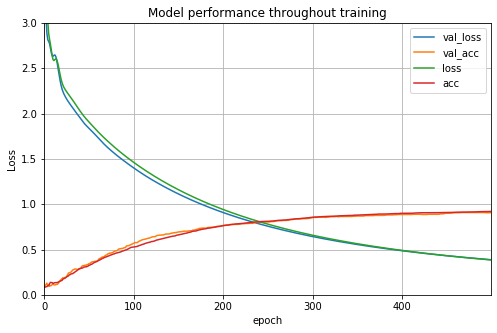

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.ylim(bottom = 0, top = 3);
plt.show()

In [23]:
prediction = model.predict(X_val_pretrained_features)
print(np.argmax(prediction, axis=1))

[4 5 6 5 9 8 6 7 8 5 1 5 3 0 6 6 9 8 9 3 9 2 6 4 5 7 3 6 8 5 7 8 1 9 1 4 6
 0 5 7 3 3 1 0 0 7 9 3 2 5 0 5 4 7 0 9 4 2 7 2 2 3 7 3 8 5 7 4 8 1 0 0 7 3
 1 5 5 1 6 2 2 5 7 9 5 9 9 1 0 7 7 1 3 1 3 1 7 7 2 3 7 9 5 9 7 0 3 2 2 3 7
 2 6 6 4 8 4 0 8 8 8 9 0 8 2 7 4 7 0 9 6 0 5 5 2 6 2 5 7 7 7 4 7 4 4 0 4 7
 8 1 5 7 0 8 4 7 4 4 0 0 3 7 5 2 4 7 1 3 6 5 2 2 7 5 0 4 3 6 9 4 0 3 1 2 1
 4 7 7 1 7 2 4 2 6 8 9 2 2 6 8 1 3 9 2 7 1 7 8 8 2 5 9 7 2 8 6 0 6 8 9 4 1
 4 0 3 8 1 0 5 7 2 1 3 4 4 0 8 1 4 1 5 6 0 9 5 9 0 7 6 5 8 1 7 9 9 1 7 8 5
 7 1 3 5 2 6 3 6 3 3 0 0 0 2 5 7 3 3 6 0 3 8 6 4 5 7 5 7 5 2 6 9 3 9 2 9 4
 8 7 0 9 9 6 6 2 2 6 7 5 9 5 4 4 0 5 5 1 4 6 9 7 8 2 9 9 0 7 2 5 6 0 9 1 0
 8 7 9 5 3 5 1 2 6 8 8 8 5 7 8 7 3 1 3 3 2 6 0 9 3 9 0 0 5 0 5 5 3 8 1 4 6
 8 6 0 0 7 9 1 9 4 1 3 2 0 1 4 6 2 5 5 3 4 9 7 2 4 2 9 2 0 7 7 9 8 7 0 7 9
 8 6 7 0 2 0]


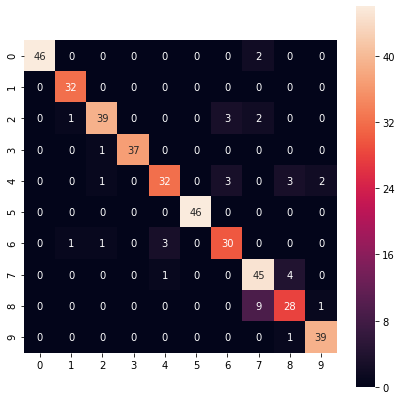

Accuracy: 0.9055690072639225


In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_class = y_val.argmax(axis=1)
y_pred_class = prediction.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(7,7))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy:',accuracy_score(y_train_class, y_pred_class))

### Accuracy : 0.90

## K-fold cross validation
https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

* TO DO: leave only the fit in the loop and put before all the model definition

In [8]:
X = np.expand_dims(X, axis=3)
print(X.shape)

(2062, 64, 64, 1)


In [9]:
#Reshape from grayscale to RGB
X_empty = np.empty([X.shape[0], X.shape[1], X.shape[2], 3])
X_empty[..., :] = X[..., :]
X = X_empty
X[10,6,5,:]

array([0.65882355, 0.65882355, 0.65882355])

In [12]:
import tensorflow as tf
import keras
from keras.layers import Dense
from sklearn.model_selection import KFold
import numpy
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet
seed = 7

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y_ordered):
    
    np.random.seed(seed)
    tf.set_random_seed(seed)
    #tf.random.set_seed(seed)
    
    pretrained_model = MobileNet(input_shape=(64,64,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

    for layer in pretrained_model.layers:
        layer.trainable = False

    #Take only the first 41 layers
    model = Sequential()
    for i in range(41):
        model.add(pretrained_model.layers[i])

    pretrained_model = model
    
    X_train_pretrained_features = pretrained_model.predict(X[train])
    X_val_pretrained_features = pretrained_model.predict(X[test])

    model = Sequential()
    model.add(Dense(10, input_shape=X_train_pretrained_features.shape[1:]))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

    from keras.optimizers import SGD, Adam, Adamax 

    loss = 'categorical_crossentropy'
    LEARNING_RATE = 0.001
    EPOCHS = 500

    model.compile(loss=loss,
                   optimizer=Adamax(lr=LEARNING_RATE), # SGD(lr=LEARNING_RATE)
                   metrics=['accuracy'])

    history = model.fit(X_train_pretrained_features,
                         Y_ordered[train],
                         epochs=EPOCHS,
                         validation_data=(X_val_pretrained_features, Y_ordered[test]),
                         batch_size=X_train_pretrained_features.shape[0])

   
    scores = model.evaluate(X_val_pretrained_features, Y_ordered[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Instructions for updating:
Use tf.cast instead.
Train on 1855 samples, validate on 207 samples
Epoch 1/500
1855/1855 [==============================] - 2s 849us/step - loss: 3.2731 - acc: 0.0949 - val_loss: 2.9873 - val_acc: 0.0725
Epoch 2/500
1855/1855 [==============================] - 0s 26us/step - loss: 2.8647 - acc: 0.0938 - val_loss: 2.7562 - val_acc: 0.1063
Epoch 3/500
1855/1855 [==============================] - 0s 26us/step - loss: 2.6453 - acc: 0.1116 - val_loss: 2.6068 - val_acc: 0.1159
Epoch 4/500
1855/1855 [==============================] - 0s 27us/step - loss: 2.5131 - acc: 0.1305 - val_loss: 2.5290 - val_acc: 0.1159
Epoch 5/500
1855/1855 [==============================] - 0s 29us/step - loss: 2.4472 - acc: 0.1456 - val_loss: 2.4970 - val_acc: 0.1159
Epoch 6/500
1855/1855 [==============================] - 0s 27us/step - loss: 2.4188 - acc: 0.1553 - val_loss: 2.4816 - val_acc: 0.1256
Epoch 7/500
1855/1855 [==============================] - 0s 28us/step - loss: 2.3996 - a

Epoch 59/500
1855/1855 [==============================] - 0s 28us/step - loss: 1.3056 - acc: 0.6065 - val_loss: 1.4131 - val_acc: 0.5459
Epoch 60/500
1855/1855 [==============================] - 0s 25us/step - loss: 1.2937 - acc: 0.6129 - val_loss: 1.4011 - val_acc: 0.5507
Epoch 61/500
1855/1855 [==============================] - 0s 24us/step - loss: 1.2819 - acc: 0.6205 - val_loss: 1.3893 - val_acc: 0.5556
Epoch 62/500
1855/1855 [==============================] - 0s 27us/step - loss: 1.2704 - acc: 0.6259 - val_loss: 1.3778 - val_acc: 0.5604
Epoch 63/500
1855/1855 [==============================] - 0s 27us/step - loss: 1.2590 - acc: 0.6270 - val_loss: 1.3665 - val_acc: 0.5700
Epoch 64/500
1855/1855 [==============================] - 0s 25us/step - loss: 1.2477 - acc: 0.6286 - val_loss: 1.3554 - val_acc: 0.5700
Epoch 65/500
1855/1855 [==============================] - 0s 24us/step - loss: 1.2366 - acc: 0.6334 - val_loss: 1.3446 - val_acc: 0.5652
Epoch 66/500
1855/1855 [=================

Epoch 119/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.8061 - acc: 0.7854 - val_loss: 0.9202 - val_acc: 0.7101
Epoch 120/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.8004 - acc: 0.7881 - val_loss: 0.9146 - val_acc: 0.7150
Epoch 121/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.7947 - acc: 0.7908 - val_loss: 0.9090 - val_acc: 0.7150
Epoch 122/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.7891 - acc: 0.7930 - val_loss: 0.9035 - val_acc: 0.7198
Epoch 123/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.7835 - acc: 0.7946 - val_loss: 0.8981 - val_acc: 0.7246
Epoch 124/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.7780 - acc: 0.7973 - val_loss: 0.8927 - val_acc: 0.7246
Epoch 125/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.7726 - acc: 0.7989 - val_loss: 0.8874 - val_acc: 0.7246
Epoch 126/500
1855/1855 [=========

Epoch 179/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.5482 - acc: 0.8647 - val_loss: 0.6661 - val_acc: 0.8019
Epoch 180/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.5451 - acc: 0.8652 - val_loss: 0.6629 - val_acc: 0.8019
Epoch 181/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.5420 - acc: 0.8668 - val_loss: 0.6598 - val_acc: 0.8019
Epoch 182/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.5389 - acc: 0.8668 - val_loss: 0.6568 - val_acc: 0.8019
Epoch 183/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.5359 - acc: 0.8668 - val_loss: 0.6538 - val_acc: 0.8019
Epoch 184/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.5329 - acc: 0.8679 - val_loss: 0.6508 - val_acc: 0.8019
Epoch 185/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.5299 - acc: 0.8690 - val_loss: 0.6478 - val_acc: 0.8019
Epoch 186/500
1855/1855 [=========

Epoch 239/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.4043 - acc: 0.9024 - val_loss: 0.5206 - val_acc: 0.8357
Epoch 240/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.4025 - acc: 0.9024 - val_loss: 0.5187 - val_acc: 0.8357
Epoch 241/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.4007 - acc: 0.9024 - val_loss: 0.5169 - val_acc: 0.8406
Epoch 242/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.3989 - acc: 0.9030 - val_loss: 0.5151 - val_acc: 0.8406
Epoch 243/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.3972 - acc: 0.9030 - val_loss: 0.5133 - val_acc: 0.8406
Epoch 244/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.3954 - acc: 0.9046 - val_loss: 0.5115 - val_acc: 0.8406
Epoch 245/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.3937 - acc: 0.9046 - val_loss: 0.5097 - val_acc: 0.8406
Epoch 246/500
1855/1855 [=========

Epoch 299/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.3180 - acc: 0.9283 - val_loss: 0.4320 - val_acc: 0.8599
Epoch 300/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3169 - acc: 0.9283 - val_loss: 0.4308 - val_acc: 0.8599
Epoch 301/500
1855/1855 [==============================] - 0s 23us/step - loss: 0.3158 - acc: 0.9299 - val_loss: 0.4297 - val_acc: 0.8599
Epoch 302/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.3146 - acc: 0.9305 - val_loss: 0.4285 - val_acc: 0.8599
Epoch 303/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3135 - acc: 0.9310 - val_loss: 0.4274 - val_acc: 0.8647
Epoch 304/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3124 - acc: 0.9315 - val_loss: 0.4262 - val_acc: 0.8647
Epoch 305/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3113 - acc: 0.9315 - val_loss: 0.4251 - val_acc: 0.8696
Epoch 306/500
1855/1855 [=========

Epoch 359/500
1855/1855 [==============================] - 0s 33us/step - loss: 0.2614 - acc: 0.9445 - val_loss: 0.3743 - val_acc: 0.8792
Epoch 360/500
1855/1855 [==============================] - 0s 31us/step - loss: 0.2606 - acc: 0.9445 - val_loss: 0.3735 - val_acc: 0.8792
Epoch 361/500
1855/1855 [==============================] - 0s 32us/step - loss: 0.2599 - acc: 0.9445 - val_loss: 0.3728 - val_acc: 0.8792
Epoch 362/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.2591 - acc: 0.9445 - val_loss: 0.3720 - val_acc: 0.8792
Epoch 363/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2583 - acc: 0.9445 - val_loss: 0.3712 - val_acc: 0.8792
Epoch 364/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2576 - acc: 0.9445 - val_loss: 0.3704 - val_acc: 0.8792
Epoch 365/500
1855/1855 [==============================] - 0s 49us/step - loss: 0.2568 - acc: 0.9445 - val_loss: 0.3697 - val_acc: 0.8792
Epoch 366/500
1855/1855 [=========

Epoch 419/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.2211 - acc: 0.9553 - val_loss: 0.3342 - val_acc: 0.8889
Epoch 420/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.2206 - acc: 0.9553 - val_loss: 0.3336 - val_acc: 0.8889
Epoch 421/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.2200 - acc: 0.9553 - val_loss: 0.3330 - val_acc: 0.8889
Epoch 422/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2194 - acc: 0.9553 - val_loss: 0.3325 - val_acc: 0.8889
Epoch 423/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.2189 - acc: 0.9553 - val_loss: 0.3319 - val_acc: 0.8889
Epoch 424/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2183 - acc: 0.9558 - val_loss: 0.3314 - val_acc: 0.8889
Epoch 425/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.2177 - acc: 0.9558 - val_loss: 0.3308 - val_acc: 0.8889
Epoch 426/500
1855/1855 [=========

Epoch 479/500
1855/1855 [==============================] - 0s 24us/step - loss: 0.1907 - acc: 0.9601 - val_loss: 0.3044 - val_acc: 0.8937
Epoch 480/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.1902 - acc: 0.9601 - val_loss: 0.3040 - val_acc: 0.8937
Epoch 481/500
1855/1855 [==============================] - 0s 24us/step - loss: 0.1898 - acc: 0.9601 - val_loss: 0.3036 - val_acc: 0.8937
Epoch 482/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.1894 - acc: 0.9601 - val_loss: 0.3031 - val_acc: 0.8937
Epoch 483/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.1889 - acc: 0.9601 - val_loss: 0.3027 - val_acc: 0.8937
Epoch 484/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.1885 - acc: 0.9606 - val_loss: 0.3023 - val_acc: 0.8937
Epoch 485/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.1880 - acc: 0.9606 - val_loss: 0.3019 - val_acc: 0.8937
Epoch 486/500
1855/1855 [=========

Epoch 39/500
1855/1855 [==============================] - 0s 27us/step - loss: 1.5958 - acc: 0.4884 - val_loss: 1.5969 - val_acc: 0.5121
Epoch 40/500
1855/1855 [==============================] - 0s 28us/step - loss: 1.5790 - acc: 0.4922 - val_loss: 1.5808 - val_acc: 0.5217
Epoch 41/500
1855/1855 [==============================] - 0s 26us/step - loss: 1.5624 - acc: 0.4970 - val_loss: 1.5652 - val_acc: 0.5266
Epoch 42/500
1855/1855 [==============================] - 0s 27us/step - loss: 1.5461 - acc: 0.5057 - val_loss: 1.5500 - val_acc: 0.5266
Epoch 43/500
1855/1855 [==============================] - 0s 30us/step - loss: 1.5302 - acc: 0.5137 - val_loss: 1.5352 - val_acc: 0.5314
Epoch 44/500
1855/1855 [==============================] - 0s 29us/step - loss: 1.5146 - acc: 0.5191 - val_loss: 1.5207 - val_acc: 0.5362
Epoch 45/500
1855/1855 [==============================] - 0s 33us/step - loss: 1.4994 - acc: 0.5251 - val_loss: 1.5065 - val_acc: 0.5459
Epoch 46/500
1855/1855 [=================

Epoch 99/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.9388 - acc: 0.7450 - val_loss: 0.9672 - val_acc: 0.7101
Epoch 100/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.9316 - acc: 0.7482 - val_loss: 0.9603 - val_acc: 0.7198
Epoch 101/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.9246 - acc: 0.7504 - val_loss: 0.9535 - val_acc: 0.7198
Epoch 102/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.9176 - acc: 0.7520 - val_loss: 0.9468 - val_acc: 0.7198
Epoch 103/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.9107 - acc: 0.7574 - val_loss: 0.9401 - val_acc: 0.7198
Epoch 104/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.9039 - acc: 0.7617 - val_loss: 0.9335 - val_acc: 0.7198
Epoch 105/500
1855/1855 [==============================] - 0s 24us/step - loss: 0.8971 - acc: 0.7628 - val_loss: 0.9270 - val_acc: 0.7198
Epoch 106/500
1855/1855 [==========

Epoch 159/500
1855/1855 [==============================] - 0s 31us/step - loss: 0.6216 - acc: 0.8453 - val_loss: 0.6599 - val_acc: 0.8068
Epoch 160/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.6178 - acc: 0.8469 - val_loss: 0.6562 - val_acc: 0.8068
Epoch 161/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.6141 - acc: 0.8469 - val_loss: 0.6525 - val_acc: 0.8068
Epoch 162/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.6104 - acc: 0.8491 - val_loss: 0.6488 - val_acc: 0.8068
Epoch 163/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.6067 - acc: 0.8491 - val_loss: 0.6452 - val_acc: 0.8068
Epoch 164/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.6030 - acc: 0.8496 - val_loss: 0.6416 - val_acc: 0.8068
Epoch 165/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.5994 - acc: 0.8507 - val_loss: 0.6381 - val_acc: 0.8068
Epoch 166/500
1855/1855 [=========

Epoch 219/500
1855/1855 [==============================] - 0s 34us/step - loss: 0.4480 - acc: 0.8943 - val_loss: 0.4885 - val_acc: 0.8599
Epoch 220/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.4458 - acc: 0.8949 - val_loss: 0.4864 - val_acc: 0.8599
Epoch 221/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.4437 - acc: 0.8965 - val_loss: 0.4842 - val_acc: 0.8599
Epoch 222/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.4416 - acc: 0.8970 - val_loss: 0.4821 - val_acc: 0.8599
Epoch 223/500
1855/1855 [==============================] - 0s 31us/step - loss: 0.4395 - acc: 0.8976 - val_loss: 0.4801 - val_acc: 0.8599
Epoch 224/500
1855/1855 [==============================] - 0s 32us/step - loss: 0.4374 - acc: 0.8997 - val_loss: 0.4780 - val_acc: 0.8599
Epoch 225/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.4354 - acc: 0.8997 - val_loss: 0.4759 - val_acc: 0.8599
Epoch 226/500
1855/1855 [=========

Epoch 279/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3465 - acc: 0.9218 - val_loss: 0.3874 - val_acc: 0.8937
Epoch 280/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.3451 - acc: 0.9224 - val_loss: 0.3861 - val_acc: 0.8937
Epoch 281/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.3438 - acc: 0.9229 - val_loss: 0.3848 - val_acc: 0.8937
Epoch 282/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3425 - acc: 0.9235 - val_loss: 0.3835 - val_acc: 0.8937
Epoch 283/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.3413 - acc: 0.9235 - val_loss: 0.3823 - val_acc: 0.8937
Epoch 284/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.3400 - acc: 0.9229 - val_loss: 0.3810 - val_acc: 0.8937
Epoch 285/500
1855/1855 [==============================] - 0s 24us/step - loss: 0.3387 - acc: 0.9229 - val_loss: 0.3797 - val_acc: 0.8937
Epoch 286/500
1855/1855 [=========

Epoch 339/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2817 - acc: 0.9375 - val_loss: 0.3237 - val_acc: 0.9082
Epoch 340/500
1855/1855 [==============================] - 0s 30us/step - loss: 0.2808 - acc: 0.9375 - val_loss: 0.3228 - val_acc: 0.9082
Epoch 341/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2799 - acc: 0.9375 - val_loss: 0.3220 - val_acc: 0.9082
Epoch 342/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2790 - acc: 0.9380 - val_loss: 0.3211 - val_acc: 0.9082
Epoch 343/500
1855/1855 [==============================] - 0s 33us/step - loss: 0.2782 - acc: 0.9391 - val_loss: 0.3203 - val_acc: 0.9082
Epoch 344/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2773 - acc: 0.9391 - val_loss: 0.3194 - val_acc: 0.9082
Epoch 345/500
1855/1855 [==============================] - 0s 31us/step - loss: 0.2765 - acc: 0.9391 - val_loss: 0.3186 - val_acc: 0.9082
Epoch 346/500
1855/1855 [=========

Epoch 399/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.2366 - acc: 0.9477 - val_loss: 0.2805 - val_acc: 0.9179
Epoch 400/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2360 - acc: 0.9477 - val_loss: 0.2799 - val_acc: 0.9179
Epoch 401/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.2354 - acc: 0.9482 - val_loss: 0.2793 - val_acc: 0.9179
Epoch 402/500
1855/1855 [==============================] - 0s 28us/step - loss: 0.2347 - acc: 0.9482 - val_loss: 0.2787 - val_acc: 0.9179
Epoch 403/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.2341 - acc: 0.9482 - val_loss: 0.2781 - val_acc: 0.9179
Epoch 404/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2335 - acc: 0.9482 - val_loss: 0.2775 - val_acc: 0.9179
Epoch 405/500
1855/1855 [==============================] - 0s 25us/step - loss: 0.2329 - acc: 0.9482 - val_loss: 0.2769 - val_acc: 0.9179
Epoch 406/500
1855/1855 [=========

Epoch 459/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2031 - acc: 0.9563 - val_loss: 0.2493 - val_acc: 0.9324
Epoch 460/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2026 - acc: 0.9563 - val_loss: 0.2489 - val_acc: 0.9324
Epoch 461/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2022 - acc: 0.9569 - val_loss: 0.2484 - val_acc: 0.9324
Epoch 462/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2017 - acc: 0.9569 - val_loss: 0.2480 - val_acc: 0.9324
Epoch 463/500
1855/1855 [==============================] - 0s 27us/step - loss: 0.2012 - acc: 0.9580 - val_loss: 0.2475 - val_acc: 0.9324
Epoch 464/500
1855/1855 [==============================] - 0s 26us/step - loss: 0.2007 - acc: 0.9580 - val_loss: 0.2471 - val_acc: 0.9324
Epoch 465/500
1855/1855 [==============================] - 0s 29us/step - loss: 0.2002 - acc: 0.9580 - val_loss: 0.2467 - val_acc: 0.9324
Epoch 466/500
1855/1855 [=========

Epoch 19/500
1856/1856 [==============================] - 0s 26us/step - loss: 2.0223 - acc: 0.3130 - val_loss: 2.0330 - val_acc: 0.3204
Epoch 20/500
1856/1856 [==============================] - 0s 25us/step - loss: 1.9922 - acc: 0.3265 - val_loss: 2.0080 - val_acc: 0.3252
Epoch 21/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.9640 - acc: 0.3394 - val_loss: 1.9851 - val_acc: 0.3350
Epoch 22/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.9383 - acc: 0.3464 - val_loss: 1.9641 - val_acc: 0.3398
Epoch 23/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.9149 - acc: 0.3551 - val_loss: 1.9438 - val_acc: 0.3350
Epoch 24/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.8927 - acc: 0.3642 - val_loss: 1.9235 - val_acc: 0.3398
Epoch 25/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.8708 - acc: 0.3723 - val_loss: 1.9027 - val_acc: 0.3495
Epoch 26/500
1856/1856 [=================

Epoch 79/500
1856/1856 [==============================] - 0s 28us/step - loss: 1.1030 - acc: 0.6778 - val_loss: 1.1511 - val_acc: 0.6408
Epoch 80/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.0940 - acc: 0.6805 - val_loss: 1.1419 - val_acc: 0.6456
Epoch 81/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.0850 - acc: 0.6843 - val_loss: 1.1328 - val_acc: 0.6456
Epoch 82/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.0762 - acc: 0.6864 - val_loss: 1.1239 - val_acc: 0.6505
Epoch 83/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.0675 - acc: 0.6913 - val_loss: 1.1151 - val_acc: 0.6505
Epoch 84/500
1856/1856 [==============================] - 0s 25us/step - loss: 1.0589 - acc: 0.6940 - val_loss: 1.1064 - val_acc: 0.6505
Epoch 85/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.0505 - acc: 0.6961 - val_loss: 1.0979 - val_acc: 0.6650
Epoch 86/500
1856/1856 [=================

Epoch 139/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.7101 - acc: 0.8184 - val_loss: 0.7561 - val_acc: 0.7864
Epoch 140/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.7055 - acc: 0.8200 - val_loss: 0.7514 - val_acc: 0.7913
Epoch 141/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.7009 - acc: 0.8211 - val_loss: 0.7467 - val_acc: 0.7961
Epoch 142/500
1856/1856 [==============================] - 0s 24us/step - loss: 0.6964 - acc: 0.8233 - val_loss: 0.7421 - val_acc: 0.7961
Epoch 143/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.6919 - acc: 0.8238 - val_loss: 0.7376 - val_acc: 0.7961
Epoch 144/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.6875 - acc: 0.8254 - val_loss: 0.7330 - val_acc: 0.7961
Epoch 145/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.6831 - acc: 0.8276 - val_loss: 0.7286 - val_acc: 0.7961
Epoch 146/500
1856/1856 [=========

Epoch 199/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.5000 - acc: 0.8772 - val_loss: 0.5412 - val_acc: 0.8641
Epoch 200/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.4974 - acc: 0.8777 - val_loss: 0.5386 - val_acc: 0.8641
Epoch 201/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.4948 - acc: 0.8777 - val_loss: 0.5360 - val_acc: 0.8689
Epoch 202/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.4923 - acc: 0.8782 - val_loss: 0.5334 - val_acc: 0.8689
Epoch 203/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4898 - acc: 0.8793 - val_loss: 0.5308 - val_acc: 0.8689
Epoch 204/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.4873 - acc: 0.8798 - val_loss: 0.5282 - val_acc: 0.8689
Epoch 205/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4849 - acc: 0.8809 - val_loss: 0.5257 - val_acc: 0.8689
Epoch 206/500
1856/1856 [=========

Epoch 259/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3800 - acc: 0.9138 - val_loss: 0.4175 - val_acc: 0.8981
Epoch 260/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3785 - acc: 0.9138 - val_loss: 0.4160 - val_acc: 0.8981
Epoch 261/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3769 - acc: 0.9143 - val_loss: 0.4144 - val_acc: 0.8981
Epoch 262/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3754 - acc: 0.9143 - val_loss: 0.4129 - val_acc: 0.8981
Epoch 263/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3739 - acc: 0.9149 - val_loss: 0.4113 - val_acc: 0.9029
Epoch 264/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.3725 - acc: 0.9149 - val_loss: 0.4098 - val_acc: 0.9029
Epoch 265/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3710 - acc: 0.9154 - val_loss: 0.4083 - val_acc: 0.9029
Epoch 266/500
1856/1856 [=========

Epoch 319/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3058 - acc: 0.9283 - val_loss: 0.3414 - val_acc: 0.9175
Epoch 320/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.3048 - acc: 0.9283 - val_loss: 0.3404 - val_acc: 0.9175
Epoch 321/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3038 - acc: 0.9283 - val_loss: 0.3394 - val_acc: 0.9175
Epoch 322/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3028 - acc: 0.9289 - val_loss: 0.3384 - val_acc: 0.9175
Epoch 323/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3019 - acc: 0.9289 - val_loss: 0.3374 - val_acc: 0.9175
Epoch 324/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.3009 - acc: 0.9289 - val_loss: 0.3364 - val_acc: 0.9175
Epoch 325/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2999 - acc: 0.9289 - val_loss: 0.3354 - val_acc: 0.9175
Epoch 326/500
1856/1856 [=========

Epoch 379/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2557 - acc: 0.9418 - val_loss: 0.2905 - val_acc: 0.9272
Epoch 380/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2550 - acc: 0.9418 - val_loss: 0.2898 - val_acc: 0.9272
Epoch 381/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2543 - acc: 0.9418 - val_loss: 0.2891 - val_acc: 0.9272
Epoch 382/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2536 - acc: 0.9418 - val_loss: 0.2884 - val_acc: 0.9272
Epoch 383/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2529 - acc: 0.9423 - val_loss: 0.2877 - val_acc: 0.9272
Epoch 384/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2522 - acc: 0.9423 - val_loss: 0.2870 - val_acc: 0.9272
Epoch 385/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2515 - acc: 0.9423 - val_loss: 0.2863 - val_acc: 0.9272
Epoch 386/500
1856/1856 [=========

Epoch 439/500
1856/1856 [==============================] - 0s 24us/step - loss: 0.2191 - acc: 0.9483 - val_loss: 0.2537 - val_acc: 0.9466
Epoch 440/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2186 - acc: 0.9488 - val_loss: 0.2532 - val_acc: 0.9466
Epoch 441/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2181 - acc: 0.9488 - val_loss: 0.2526 - val_acc: 0.9466
Epoch 442/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2175 - acc: 0.9488 - val_loss: 0.2521 - val_acc: 0.9466
Epoch 443/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2170 - acc: 0.9488 - val_loss: 0.2516 - val_acc: 0.9466
Epoch 444/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2165 - acc: 0.9488 - val_loss: 0.2511 - val_acc: 0.9466
Epoch 445/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2160 - acc: 0.9488 - val_loss: 0.2505 - val_acc: 0.9466
Epoch 446/500
1856/1856 [=========

Epoch 499/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.1909 - acc: 0.9558 - val_loss: 0.2254 - val_acc: 0.9515
Epoch 500/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.1905 - acc: 0.9564 - val_loss: 0.2250 - val_acc: 0.9515
acc: 95.15%
Train on 1856 samples, validate on 206 samples
Epoch 1/500
1856/1856 [==============================] - 3s 2ms/step - loss: 3.2653 - acc: 0.0911 - val_loss: 2.9802 - val_acc: 0.1068
Epoch 2/500
1856/1856 [==============================] - 0s 25us/step - loss: 2.8581 - acc: 0.0921 - val_loss: 2.7200 - val_acc: 0.1117
Epoch 3/500
1856/1856 [==============================] - 0s 25us/step - loss: 2.6405 - acc: 0.1158 - val_loss: 2.5615 - val_acc: 0.1456
Epoch 4/500
1856/1856 [==============================] - 0s 24us/step - loss: 2.5128 - acc: 0.1304 - val_loss: 2.4783 - val_acc: 0.1456
Epoch 5/500
1856/1856 [==============================] - 0s 25us/step - loss: 2.4509 - acc: 0.1428 - val_loss: 2.4387 - va

Epoch 59/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.3030 - acc: 0.6056 - val_loss: 1.3515 - val_acc: 0.5874
Epoch 60/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.2910 - acc: 0.6121 - val_loss: 1.3406 - val_acc: 0.5971
Epoch 61/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.2793 - acc: 0.6137 - val_loss: 1.3298 - val_acc: 0.6019
Epoch 62/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.2677 - acc: 0.6158 - val_loss: 1.3191 - val_acc: 0.6068
Epoch 63/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.2562 - acc: 0.6169 - val_loss: 1.3085 - val_acc: 0.6117
Epoch 64/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.2449 - acc: 0.6191 - val_loss: 1.2979 - val_acc: 0.6117
Epoch 65/500
1856/1856 [==============================] - 0s 28us/step - loss: 1.2338 - acc: 0.6250 - val_loss: 1.2875 - val_acc: 0.6068
Epoch 66/500
1856/1856 [=================

Epoch 119/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.8031 - acc: 0.7920 - val_loss: 0.8790 - val_acc: 0.7427
Epoch 120/500
1856/1856 [==============================] - 0s 48us/step - loss: 0.7974 - acc: 0.7963 - val_loss: 0.8736 - val_acc: 0.7476
Epoch 121/500
1856/1856 [==============================] - 0s 49us/step - loss: 0.7917 - acc: 0.8001 - val_loss: 0.8682 - val_acc: 0.7476
Epoch 122/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.7861 - acc: 0.8012 - val_loss: 0.8629 - val_acc: 0.7476
Epoch 123/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.7806 - acc: 0.8023 - val_loss: 0.8577 - val_acc: 0.7476
Epoch 124/500
1856/1856 [==============================] - 0s 24us/step - loss: 0.7751 - acc: 0.8028 - val_loss: 0.8525 - val_acc: 0.7476
Epoch 125/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.7697 - acc: 0.8055 - val_loss: 0.8474 - val_acc: 0.7476
Epoch 126/500
1856/1856 [=========

Epoch 179/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.5455 - acc: 0.8653 - val_loss: 0.6373 - val_acc: 0.8301
Epoch 180/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.5423 - acc: 0.8669 - val_loss: 0.6344 - val_acc: 0.8350
Epoch 181/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.5392 - acc: 0.8675 - val_loss: 0.6315 - val_acc: 0.8350
Epoch 182/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.5362 - acc: 0.8675 - val_loss: 0.6287 - val_acc: 0.8350
Epoch 183/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.5331 - acc: 0.8691 - val_loss: 0.6259 - val_acc: 0.8350
Epoch 184/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.5301 - acc: 0.8702 - val_loss: 0.6231 - val_acc: 0.8350
Epoch 185/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.5271 - acc: 0.8712 - val_loss: 0.6204 - val_acc: 0.8350
Epoch 186/500
1856/1856 [=========

Epoch 239/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4009 - acc: 0.9030 - val_loss: 0.5059 - val_acc: 0.8835
Epoch 240/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3991 - acc: 0.9036 - val_loss: 0.5043 - val_acc: 0.8883
Epoch 241/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3973 - acc: 0.9052 - val_loss: 0.5027 - val_acc: 0.8883
Epoch 242/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3955 - acc: 0.9057 - val_loss: 0.5012 - val_acc: 0.8883
Epoch 243/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3938 - acc: 0.9062 - val_loss: 0.4996 - val_acc: 0.8883
Epoch 244/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3920 - acc: 0.9079 - val_loss: 0.4980 - val_acc: 0.8932
Epoch 245/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.3903 - acc: 0.9084 - val_loss: 0.4965 - val_acc: 0.8932
Epoch 246/500
1856/1856 [=========

Epoch 299/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3137 - acc: 0.9262 - val_loss: 0.4309 - val_acc: 0.9078
Epoch 300/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.3125 - acc: 0.9267 - val_loss: 0.4300 - val_acc: 0.9078
Epoch 301/500
1856/1856 [==============================] - 0s 24us/step - loss: 0.3114 - acc: 0.9267 - val_loss: 0.4290 - val_acc: 0.9078
Epoch 302/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3103 - acc: 0.9267 - val_loss: 0.4281 - val_acc: 0.9078
Epoch 303/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3091 - acc: 0.9267 - val_loss: 0.4272 - val_acc: 0.9078
Epoch 304/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3080 - acc: 0.9267 - val_loss: 0.4263 - val_acc: 0.9078
Epoch 305/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3069 - acc: 0.9267 - val_loss: 0.4253 - val_acc: 0.9078
Epoch 306/500
1856/1856 [=========

Epoch 359/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2561 - acc: 0.9407 - val_loss: 0.3849 - val_acc: 0.9175
Epoch 360/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2553 - acc: 0.9413 - val_loss: 0.3843 - val_acc: 0.9175
Epoch 361/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2545 - acc: 0.9423 - val_loss: 0.3837 - val_acc: 0.9223
Epoch 362/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2537 - acc: 0.9423 - val_loss: 0.3831 - val_acc: 0.9223
Epoch 363/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2529 - acc: 0.9429 - val_loss: 0.3825 - val_acc: 0.9223
Epoch 364/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2522 - acc: 0.9440 - val_loss: 0.3819 - val_acc: 0.9223
Epoch 365/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2514 - acc: 0.9440 - val_loss: 0.3814 - val_acc: 0.9223
Epoch 366/500
1856/1856 [=========

Epoch 419/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2149 - acc: 0.9542 - val_loss: 0.3546 - val_acc: 0.9272
Epoch 420/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2143 - acc: 0.9547 - val_loss: 0.3542 - val_acc: 0.9272
Epoch 421/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2137 - acc: 0.9547 - val_loss: 0.3537 - val_acc: 0.9272
Epoch 422/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2132 - acc: 0.9553 - val_loss: 0.3533 - val_acc: 0.9272
Epoch 423/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2126 - acc: 0.9553 - val_loss: 0.3529 - val_acc: 0.9272
Epoch 424/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2120 - acc: 0.9558 - val_loss: 0.3525 - val_acc: 0.9272
Epoch 425/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2114 - acc: 0.9564 - val_loss: 0.3521 - val_acc: 0.9272
Epoch 426/500
1856/1856 [=========

Epoch 479/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.1837 - acc: 0.9601 - val_loss: 0.3332 - val_acc: 0.9272
Epoch 480/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.1832 - acc: 0.9601 - val_loss: 0.3329 - val_acc: 0.9272
Epoch 481/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.1828 - acc: 0.9601 - val_loss: 0.3326 - val_acc: 0.9272
Epoch 482/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1823 - acc: 0.9601 - val_loss: 0.3323 - val_acc: 0.9272
Epoch 483/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.1819 - acc: 0.9601 - val_loss: 0.3320 - val_acc: 0.9272
Epoch 484/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.1814 - acc: 0.9601 - val_loss: 0.3317 - val_acc: 0.9272
Epoch 485/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.1810 - acc: 0.9601 - val_loss: 0.3314 - val_acc: 0.9272
Epoch 486/500
1856/1856 [=========

Epoch 39/500
1856/1856 [==============================] - 0s 47us/step - loss: 1.5997 - acc: 0.4871 - val_loss: 1.5769 - val_acc: 0.4563
Epoch 40/500
1856/1856 [==============================] - 0s 51us/step - loss: 1.5829 - acc: 0.4941 - val_loss: 1.5603 - val_acc: 0.4757
Epoch 41/500
1856/1856 [==============================] - 0s 32us/step - loss: 1.5664 - acc: 0.5032 - val_loss: 1.5441 - val_acc: 0.4806
Epoch 42/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.5502 - acc: 0.5108 - val_loss: 1.5282 - val_acc: 0.4951
Epoch 43/500
1856/1856 [==============================] - 0s 25us/step - loss: 1.5343 - acc: 0.5140 - val_loss: 1.5125 - val_acc: 0.5097
Epoch 44/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.5188 - acc: 0.5237 - val_loss: 1.4970 - val_acc: 0.5194
Epoch 45/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.5035 - acc: 0.5296 - val_loss: 1.4816 - val_acc: 0.5194
Epoch 46/500
1856/1856 [=================

Epoch 99/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.9446 - acc: 0.7349 - val_loss: 0.9297 - val_acc: 0.7864
Epoch 100/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.9375 - acc: 0.7387 - val_loss: 0.9228 - val_acc: 0.7864
Epoch 101/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.9305 - acc: 0.7408 - val_loss: 0.9159 - val_acc: 0.7864
Epoch 102/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.9235 - acc: 0.7435 - val_loss: 0.9090 - val_acc: 0.7913
Epoch 103/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.9166 - acc: 0.7457 - val_loss: 0.9023 - val_acc: 0.7961
Epoch 104/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.9098 - acc: 0.7489 - val_loss: 0.8956 - val_acc: 0.8010
Epoch 105/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.9031 - acc: 0.7505 - val_loss: 0.8889 - val_acc: 0.8010
Epoch 106/500
1856/1856 [==========

Epoch 159/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6272 - acc: 0.8378 - val_loss: 0.6200 - val_acc: 0.8786
Epoch 160/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.6234 - acc: 0.8384 - val_loss: 0.6164 - val_acc: 0.8786
Epoch 161/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.6196 - acc: 0.8384 - val_loss: 0.6127 - val_acc: 0.8786
Epoch 162/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6159 - acc: 0.8394 - val_loss: 0.6091 - val_acc: 0.8786
Epoch 163/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6121 - acc: 0.8405 - val_loss: 0.6056 - val_acc: 0.8786
Epoch 164/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.6085 - acc: 0.8421 - val_loss: 0.6021 - val_acc: 0.8786
Epoch 165/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6048 - acc: 0.8443 - val_loss: 0.5986 - val_acc: 0.8786
Epoch 166/500
1856/1856 [=========

Epoch 219/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4522 - acc: 0.8912 - val_loss: 0.4545 - val_acc: 0.8932
Epoch 220/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4500 - acc: 0.8922 - val_loss: 0.4525 - val_acc: 0.8932
Epoch 221/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4479 - acc: 0.8922 - val_loss: 0.4505 - val_acc: 0.8932
Epoch 222/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4457 - acc: 0.8928 - val_loss: 0.4486 - val_acc: 0.8932
Epoch 223/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4436 - acc: 0.8928 - val_loss: 0.4466 - val_acc: 0.8932
Epoch 224/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4415 - acc: 0.8933 - val_loss: 0.4447 - val_acc: 0.8932
Epoch 225/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4395 - acc: 0.8939 - val_loss: 0.4428 - val_acc: 0.8932
Epoch 226/500
1856/1856 [=========

Epoch 279/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.3495 - acc: 0.9235 - val_loss: 0.3618 - val_acc: 0.9029
Epoch 280/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3481 - acc: 0.9235 - val_loss: 0.3607 - val_acc: 0.9029
Epoch 281/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3468 - acc: 0.9235 - val_loss: 0.3595 - val_acc: 0.9029
Epoch 282/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3455 - acc: 0.9246 - val_loss: 0.3584 - val_acc: 0.9029
Epoch 283/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3442 - acc: 0.9251 - val_loss: 0.3572 - val_acc: 0.9029
Epoch 284/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3429 - acc: 0.9251 - val_loss: 0.3561 - val_acc: 0.9078
Epoch 285/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3416 - acc: 0.9251 - val_loss: 0.3550 - val_acc: 0.9078
Epoch 286/500
1856/1856 [=========

Epoch 339/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2838 - acc: 0.9386 - val_loss: 0.3061 - val_acc: 0.9078
Epoch 340/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2829 - acc: 0.9386 - val_loss: 0.3054 - val_acc: 0.9126
Epoch 341/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2820 - acc: 0.9386 - val_loss: 0.3046 - val_acc: 0.9126
Epoch 342/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2811 - acc: 0.9386 - val_loss: 0.3039 - val_acc: 0.9126
Epoch 343/500
1856/1856 [==============================] - 0s 48us/step - loss: 0.2802 - acc: 0.9386 - val_loss: 0.3032 - val_acc: 0.9126
Epoch 344/500
1856/1856 [==============================] - 0s 50us/step - loss: 0.2794 - acc: 0.9386 - val_loss: 0.3025 - val_acc: 0.9126
Epoch 345/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2785 - acc: 0.9397 - val_loss: 0.3018 - val_acc: 0.9126
Epoch 346/500
1856/1856 [=========

Epoch 399/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2381 - acc: 0.9499 - val_loss: 0.2700 - val_acc: 0.9272
Epoch 400/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2374 - acc: 0.9499 - val_loss: 0.2695 - val_acc: 0.9272
Epoch 401/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2368 - acc: 0.9504 - val_loss: 0.2690 - val_acc: 0.9272
Epoch 402/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2362 - acc: 0.9504 - val_loss: 0.2685 - val_acc: 0.9320
Epoch 403/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.2355 - acc: 0.9504 - val_loss: 0.2680 - val_acc: 0.9320
Epoch 404/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2349 - acc: 0.9510 - val_loss: 0.2675 - val_acc: 0.9320
Epoch 405/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2343 - acc: 0.9510 - val_loss: 0.2671 - val_acc: 0.9320
Epoch 406/500
1856/1856 [=========

Epoch 459/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2041 - acc: 0.9537 - val_loss: 0.2448 - val_acc: 0.9320
Epoch 460/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2036 - acc: 0.9537 - val_loss: 0.2445 - val_acc: 0.9320
Epoch 461/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2031 - acc: 0.9542 - val_loss: 0.2441 - val_acc: 0.9320
Epoch 462/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2027 - acc: 0.9542 - val_loss: 0.2438 - val_acc: 0.9320
Epoch 463/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2022 - acc: 0.9547 - val_loss: 0.2434 - val_acc: 0.9320
Epoch 464/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2017 - acc: 0.9553 - val_loss: 0.2431 - val_acc: 0.9320
Epoch 465/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2012 - acc: 0.9553 - val_loss: 0.2427 - val_acc: 0.9320
Epoch 466/500
1856/1856 [=========

Epoch 19/500
1856/1856 [==============================] - 0s 26us/step - loss: 2.0250 - acc: 0.3217 - val_loss: 2.0619 - val_acc: 0.3058
Epoch 20/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.9948 - acc: 0.3314 - val_loss: 2.0316 - val_acc: 0.3155
Epoch 21/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.9660 - acc: 0.3470 - val_loss: 2.0034 - val_acc: 0.3301
Epoch 22/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.9394 - acc: 0.3567 - val_loss: 1.9773 - val_acc: 0.3495
Epoch 23/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.9150 - acc: 0.3626 - val_loss: 1.9525 - val_acc: 0.3495
Epoch 24/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.8922 - acc: 0.3685 - val_loss: 1.9284 - val_acc: 0.3592
Epoch 25/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.8700 - acc: 0.3798 - val_loss: 1.9043 - val_acc: 0.3689
Epoch 26/500
1856/1856 [=================

Epoch 79/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.1016 - acc: 0.6762 - val_loss: 1.1913 - val_acc: 0.6311
Epoch 80/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.0926 - acc: 0.6800 - val_loss: 1.1826 - val_acc: 0.6311
Epoch 81/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.0838 - acc: 0.6832 - val_loss: 1.1739 - val_acc: 0.6359
Epoch 82/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.0750 - acc: 0.6864 - val_loss: 1.1654 - val_acc: 0.6359
Epoch 83/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.0664 - acc: 0.6907 - val_loss: 1.1570 - val_acc: 0.6359
Epoch 84/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.0579 - acc: 0.6977 - val_loss: 1.1486 - val_acc: 0.6359
Epoch 85/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.0495 - acc: 0.7004 - val_loss: 1.1404 - val_acc: 0.6408
Epoch 86/500
1856/1856 [=================

Epoch 139/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.7127 - acc: 0.8168 - val_loss: 0.7929 - val_acc: 0.7864
Epoch 140/500
1856/1856 [==============================] - 0s 51us/step - loss: 0.7081 - acc: 0.8179 - val_loss: 0.7880 - val_acc: 0.7864
Epoch 141/500
1856/1856 [==============================] - 0s 52us/step - loss: 0.7036 - acc: 0.8195 - val_loss: 0.7831 - val_acc: 0.7864
Epoch 142/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.6991 - acc: 0.8200 - val_loss: 0.7783 - val_acc: 0.7864
Epoch 143/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6946 - acc: 0.8222 - val_loss: 0.7736 - val_acc: 0.7864
Epoch 144/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6902 - acc: 0.8238 - val_loss: 0.7689 - val_acc: 0.7864
Epoch 145/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.6858 - acc: 0.8254 - val_loss: 0.7642 - val_acc: 0.7864
Epoch 146/500
1856/1856 [=========

Epoch 199/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.5025 - acc: 0.8728 - val_loss: 0.5685 - val_acc: 0.8350
Epoch 200/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4999 - acc: 0.8728 - val_loss: 0.5658 - val_acc: 0.8350
Epoch 201/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.4974 - acc: 0.8734 - val_loss: 0.5630 - val_acc: 0.8350
Epoch 202/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4948 - acc: 0.8734 - val_loss: 0.5603 - val_acc: 0.8447
Epoch 203/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.4923 - acc: 0.8745 - val_loss: 0.5576 - val_acc: 0.8495
Epoch 204/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4898 - acc: 0.8750 - val_loss: 0.5550 - val_acc: 0.8495
Epoch 205/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.4873 - acc: 0.8755 - val_loss: 0.5523 - val_acc: 0.8495
Epoch 206/500
1856/1856 [=========

Epoch 259/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3811 - acc: 0.9106 - val_loss: 0.4399 - val_acc: 0.8835
Epoch 260/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3795 - acc: 0.9116 - val_loss: 0.4383 - val_acc: 0.8835
Epoch 261/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3780 - acc: 0.9127 - val_loss: 0.4367 - val_acc: 0.8835
Epoch 262/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3765 - acc: 0.9127 - val_loss: 0.4351 - val_acc: 0.8835
Epoch 263/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3749 - acc: 0.9133 - val_loss: 0.4335 - val_acc: 0.8835
Epoch 264/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3734 - acc: 0.9133 - val_loss: 0.4319 - val_acc: 0.8835
Epoch 265/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.3720 - acc: 0.9138 - val_loss: 0.4304 - val_acc: 0.8835
Epoch 266/500
1856/1856 [=========

Epoch 319/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3057 - acc: 0.9353 - val_loss: 0.3614 - val_acc: 0.8981
Epoch 320/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3047 - acc: 0.9353 - val_loss: 0.3604 - val_acc: 0.8981
Epoch 321/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3037 - acc: 0.9353 - val_loss: 0.3594 - val_acc: 0.8981
Epoch 322/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3027 - acc: 0.9353 - val_loss: 0.3583 - val_acc: 0.8981
Epoch 323/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3017 - acc: 0.9353 - val_loss: 0.3573 - val_acc: 0.8981
Epoch 324/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.3007 - acc: 0.9353 - val_loss: 0.3563 - val_acc: 0.8981
Epoch 325/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2998 - acc: 0.9353 - val_loss: 0.3553 - val_acc: 0.8981
Epoch 326/500
1856/1856 [=========

Epoch 379/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2549 - acc: 0.9461 - val_loss: 0.3094 - val_acc: 0.9126
Epoch 380/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2541 - acc: 0.9461 - val_loss: 0.3086 - val_acc: 0.9175
Epoch 381/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2534 - acc: 0.9461 - val_loss: 0.3079 - val_acc: 0.9175
Epoch 382/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2527 - acc: 0.9461 - val_loss: 0.3072 - val_acc: 0.9223
Epoch 383/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2520 - acc: 0.9461 - val_loss: 0.3065 - val_acc: 0.9223
Epoch 384/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2513 - acc: 0.9461 - val_loss: 0.3058 - val_acc: 0.9223
Epoch 385/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2506 - acc: 0.9461 - val_loss: 0.3051 - val_acc: 0.9223
Epoch 386/500
1856/1856 [=========

Epoch 439/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2179 - acc: 0.9531 - val_loss: 0.2722 - val_acc: 0.9223
Epoch 440/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2173 - acc: 0.9531 - val_loss: 0.2716 - val_acc: 0.9223
Epoch 441/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2168 - acc: 0.9531 - val_loss: 0.2711 - val_acc: 0.9223
Epoch 442/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2163 - acc: 0.9537 - val_loss: 0.2706 - val_acc: 0.9223
Epoch 443/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2158 - acc: 0.9537 - val_loss: 0.2701 - val_acc: 0.9223
Epoch 444/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2152 - acc: 0.9537 - val_loss: 0.2695 - val_acc: 0.9223
Epoch 445/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2147 - acc: 0.9537 - val_loss: 0.2690 - val_acc: 0.9223
Epoch 446/500
1856/1856 [=========

Epoch 499/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.1894 - acc: 0.9580 - val_loss: 0.2440 - val_acc: 0.9272
Epoch 500/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.1890 - acc: 0.9585 - val_loss: 0.2436 - val_acc: 0.9272
acc: 92.72%
Train on 1856 samples, validate on 206 samples
Epoch 1/500
1856/1856 [==============================] - 5s 3ms/step - loss: 3.2932 - acc: 0.0884 - val_loss: 2.7875 - val_acc: 0.1068
Epoch 2/500
1856/1856 [==============================] - 0s 26us/step - loss: 2.8808 - acc: 0.0927 - val_loss: 2.5638 - val_acc: 0.1311
Epoch 3/500
1856/1856 [==============================] - 0s 49us/step - loss: 2.6594 - acc: 0.1121 - val_loss: 2.4294 - val_acc: 0.1602
Epoch 4/500
1856/1856 [==============================] - 0s 50us/step - loss: 2.5290 - acc: 0.1309 - val_loss: 2.3609 - val_acc: 0.1748
Epoch 5/500
1856/1856 [==============================] - 0s 32us/step - loss: 2.4664 - acc: 0.1390 - val_loss: 2.3285 - va

Epoch 59/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.3155 - acc: 0.6078 - val_loss: 1.2546 - val_acc: 0.6214
Epoch 60/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.3034 - acc: 0.6126 - val_loss: 1.2435 - val_acc: 0.6262
Epoch 61/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.2916 - acc: 0.6137 - val_loss: 1.2326 - val_acc: 0.6262
Epoch 62/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.2798 - acc: 0.6180 - val_loss: 1.2218 - val_acc: 0.6262
Epoch 63/500
1856/1856 [==============================] - 0s 26us/step - loss: 1.2683 - acc: 0.6202 - val_loss: 1.2112 - val_acc: 0.6262
Epoch 64/500
1856/1856 [==============================] - 0s 28us/step - loss: 1.2569 - acc: 0.6218 - val_loss: 1.2008 - val_acc: 0.6311
Epoch 65/500
1856/1856 [==============================] - 0s 28us/step - loss: 1.2456 - acc: 0.6261 - val_loss: 1.1905 - val_acc: 0.6408
Epoch 66/500
1856/1856 [=================

Epoch 119/500
1856/1856 [==============================] - 0s 51us/step - loss: 0.8105 - acc: 0.7834 - val_loss: 0.8040 - val_acc: 0.7961
Epoch 120/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.8047 - acc: 0.7845 - val_loss: 0.7989 - val_acc: 0.8010
Epoch 121/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.7990 - acc: 0.7861 - val_loss: 0.7938 - val_acc: 0.8058
Epoch 122/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.7933 - acc: 0.7861 - val_loss: 0.7888 - val_acc: 0.8058
Epoch 123/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.7877 - acc: 0.7872 - val_loss: 0.7839 - val_acc: 0.8058
Epoch 124/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.7822 - acc: 0.7888 - val_loss: 0.7790 - val_acc: 0.8155
Epoch 125/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.7767 - acc: 0.7909 - val_loss: 0.7742 - val_acc: 0.8155
Epoch 126/500
1856/1856 [=========

Epoch 179/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.5507 - acc: 0.8648 - val_loss: 0.5751 - val_acc: 0.8544
Epoch 180/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.5475 - acc: 0.8653 - val_loss: 0.5724 - val_acc: 0.8544
Epoch 181/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.5444 - acc: 0.8669 - val_loss: 0.5697 - val_acc: 0.8592
Epoch 182/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.5413 - acc: 0.8669 - val_loss: 0.5670 - val_acc: 0.8592
Epoch 183/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.5383 - acc: 0.8685 - val_loss: 0.5643 - val_acc: 0.8592
Epoch 184/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.5353 - acc: 0.8691 - val_loss: 0.5616 - val_acc: 0.8592
Epoch 185/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.5323 - acc: 0.8702 - val_loss: 0.5590 - val_acc: 0.8592
Epoch 186/500
1856/1856 [=========

Epoch 239/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4059 - acc: 0.9111 - val_loss: 0.4494 - val_acc: 0.8786
Epoch 240/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4040 - acc: 0.9116 - val_loss: 0.4479 - val_acc: 0.8786
Epoch 241/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.4023 - acc: 0.9122 - val_loss: 0.4464 - val_acc: 0.8786
Epoch 242/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.4005 - acc: 0.9122 - val_loss: 0.4448 - val_acc: 0.8786
Epoch 243/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3987 - acc: 0.9116 - val_loss: 0.4433 - val_acc: 0.8786
Epoch 244/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.3970 - acc: 0.9127 - val_loss: 0.4418 - val_acc: 0.8786
Epoch 245/500
1856/1856 [==============================] - 0s 25us/step - loss: 0.3952 - acc: 0.9133 - val_loss: 0.4403 - val_acc: 0.8786
Epoch 246/500
1856/1856 [=========

Epoch 299/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.3195 - acc: 0.9332 - val_loss: 0.3760 - val_acc: 0.8932
Epoch 300/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3184 - acc: 0.9332 - val_loss: 0.3751 - val_acc: 0.8932
Epoch 301/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3173 - acc: 0.9332 - val_loss: 0.3741 - val_acc: 0.8932
Epoch 302/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3161 - acc: 0.9337 - val_loss: 0.3732 - val_acc: 0.8932
Epoch 303/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3150 - acc: 0.9337 - val_loss: 0.3723 - val_acc: 0.8932
Epoch 304/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.3139 - acc: 0.9337 - val_loss: 0.3713 - val_acc: 0.8932
Epoch 305/500
1856/1856 [==============================] - 0s 51us/step - loss: 0.3129 - acc: 0.9337 - val_loss: 0.3704 - val_acc: 0.8932
Epoch 306/500
1856/1856 [=========

Epoch 359/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2634 - acc: 0.9467 - val_loss: 0.3288 - val_acc: 0.8981
Epoch 360/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2626 - acc: 0.9467 - val_loss: 0.3281 - val_acc: 0.8981
Epoch 361/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2619 - acc: 0.9467 - val_loss: 0.3275 - val_acc: 0.8981
Epoch 362/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2611 - acc: 0.9467 - val_loss: 0.3268 - val_acc: 0.9029
Epoch 363/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2604 - acc: 0.9467 - val_loss: 0.3262 - val_acc: 0.9029
Epoch 364/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2596 - acc: 0.9467 - val_loss: 0.3255 - val_acc: 0.9029
Epoch 365/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2589 - acc: 0.9472 - val_loss: 0.3249 - val_acc: 0.9029
Epoch 366/500
1856/1856 [=========

Epoch 419/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2239 - acc: 0.9547 - val_loss: 0.2951 - val_acc: 0.9126
Epoch 420/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2233 - acc: 0.9553 - val_loss: 0.2946 - val_acc: 0.9126
Epoch 421/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2228 - acc: 0.9553 - val_loss: 0.2941 - val_acc: 0.9126
Epoch 422/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2222 - acc: 0.9553 - val_loss: 0.2936 - val_acc: 0.9126
Epoch 423/500
1856/1856 [==============================] - 0s 26us/step - loss: 0.2217 - acc: 0.9558 - val_loss: 0.2932 - val_acc: 0.9126
Epoch 424/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2211 - acc: 0.9564 - val_loss: 0.2927 - val_acc: 0.9126
Epoch 425/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2206 - acc: 0.9569 - val_loss: 0.2922 - val_acc: 0.9126
Epoch 426/500
1856/1856 [=========

Epoch 479/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.1942 - acc: 0.9601 - val_loss: 0.2691 - val_acc: 0.9175
Epoch 480/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.1937 - acc: 0.9601 - val_loss: 0.2687 - val_acc: 0.9175
Epoch 481/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.1933 - acc: 0.9601 - val_loss: 0.2683 - val_acc: 0.9175
Epoch 482/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.1929 - acc: 0.9601 - val_loss: 0.2679 - val_acc: 0.9175
Epoch 483/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.1924 - acc: 0.9601 - val_loss: 0.2675 - val_acc: 0.9175
Epoch 484/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.1920 - acc: 0.9601 - val_loss: 0.2671 - val_acc: 0.9175
Epoch 485/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.1916 - acc: 0.9601 - val_loss: 0.2668 - val_acc: 0.9175
Epoch 486/500
1856/1856 [=========

Epoch 39/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.5945 - acc: 0.4855 - val_loss: 1.5837 - val_acc: 0.5000
Epoch 40/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.5776 - acc: 0.4930 - val_loss: 1.5664 - val_acc: 0.5049
Epoch 41/500
1856/1856 [==============================] - 0s 28us/step - loss: 1.5610 - acc: 0.5011 - val_loss: 1.5494 - val_acc: 0.5146
Epoch 42/500
1856/1856 [==============================] - 0s 30us/step - loss: 1.5448 - acc: 0.5081 - val_loss: 1.5329 - val_acc: 0.5243
Epoch 43/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.5288 - acc: 0.5156 - val_loss: 1.5169 - val_acc: 0.5340
Epoch 44/500
1856/1856 [==============================] - 0s 29us/step - loss: 1.5132 - acc: 0.5242 - val_loss: 1.5011 - val_acc: 0.5340
Epoch 45/500
1856/1856 [==============================] - 0s 27us/step - loss: 1.4979 - acc: 0.5302 - val_loss: 1.4857 - val_acc: 0.5340
Epoch 46/500
1856/1856 [=================

Epoch 99/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.9383 - acc: 0.7446 - val_loss: 0.9421 - val_acc: 0.7379
Epoch 100/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.9312 - acc: 0.7484 - val_loss: 0.9351 - val_acc: 0.7379
Epoch 101/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.9242 - acc: 0.7511 - val_loss: 0.9282 - val_acc: 0.7379
Epoch 102/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.9173 - acc: 0.7527 - val_loss: 0.9213 - val_acc: 0.7379
Epoch 103/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.9104 - acc: 0.7543 - val_loss: 0.9145 - val_acc: 0.7379
Epoch 104/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.9036 - acc: 0.7565 - val_loss: 0.9078 - val_acc: 0.7379
Epoch 105/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.8969 - acc: 0.7586 - val_loss: 0.9011 - val_acc: 0.7379
Epoch 106/500
1856/1856 [==========

Epoch 159/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.6230 - acc: 0.8438 - val_loss: 0.6239 - val_acc: 0.8301
Epoch 160/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6192 - acc: 0.8454 - val_loss: 0.6200 - val_acc: 0.8301
Epoch 161/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6154 - acc: 0.8464 - val_loss: 0.6162 - val_acc: 0.8301
Epoch 162/500
1856/1856 [==============================] - 0s 52us/step - loss: 0.6117 - acc: 0.8464 - val_loss: 0.6124 - val_acc: 0.8301
Epoch 163/500
1856/1856 [==============================] - 0s 50us/step - loss: 0.6081 - acc: 0.8497 - val_loss: 0.6087 - val_acc: 0.8301
Epoch 164/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.6044 - acc: 0.8508 - val_loss: 0.6049 - val_acc: 0.8301
Epoch 165/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.6008 - acc: 0.8518 - val_loss: 0.6013 - val_acc: 0.8350
Epoch 166/500
1856/1856 [=========

Epoch 219/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.4502 - acc: 0.8885 - val_loss: 0.4471 - val_acc: 0.8883
Epoch 220/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.4480 - acc: 0.8906 - val_loss: 0.4449 - val_acc: 0.8883
Epoch 221/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.4459 - acc: 0.8912 - val_loss: 0.4428 - val_acc: 0.8883
Epoch 222/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4438 - acc: 0.8917 - val_loss: 0.4406 - val_acc: 0.8883
Epoch 223/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4417 - acc: 0.8917 - val_loss: 0.4385 - val_acc: 0.8883
Epoch 224/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.4397 - acc: 0.8933 - val_loss: 0.4364 - val_acc: 0.8883
Epoch 225/500
1856/1856 [==============================] - 0s 35us/step - loss: 0.4376 - acc: 0.8933 - val_loss: 0.4343 - val_acc: 0.8883
Epoch 226/500
1856/1856 [=========

Epoch 279/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.3490 - acc: 0.9235 - val_loss: 0.3453 - val_acc: 0.9126
Epoch 280/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.3477 - acc: 0.9235 - val_loss: 0.3440 - val_acc: 0.9126
Epoch 281/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.3464 - acc: 0.9235 - val_loss: 0.3427 - val_acc: 0.9126
Epoch 282/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.3451 - acc: 0.9235 - val_loss: 0.3414 - val_acc: 0.9126
Epoch 283/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.3439 - acc: 0.9235 - val_loss: 0.3401 - val_acc: 0.9126
Epoch 284/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3426 - acc: 0.9235 - val_loss: 0.3389 - val_acc: 0.9126
Epoch 285/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3413 - acc: 0.9240 - val_loss: 0.3376 - val_acc: 0.9126
Epoch 286/500
1856/1856 [=========

Epoch 339/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2845 - acc: 0.9386 - val_loss: 0.2824 - val_acc: 0.9175
Epoch 340/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2836 - acc: 0.9391 - val_loss: 0.2816 - val_acc: 0.9175
Epoch 341/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2827 - acc: 0.9391 - val_loss: 0.2807 - val_acc: 0.9175
Epoch 342/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2819 - acc: 0.9397 - val_loss: 0.2799 - val_acc: 0.9175
Epoch 343/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.2810 - acc: 0.9402 - val_loss: 0.2791 - val_acc: 0.9175
Epoch 344/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2801 - acc: 0.9402 - val_loss: 0.2783 - val_acc: 0.9175
Epoch 345/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2793 - acc: 0.9402 - val_loss: 0.2775 - val_acc: 0.9175
Epoch 346/500
1856/1856 [=========

Epoch 399/500
1856/1856 [==============================] - 0s 27us/step - loss: 0.2396 - acc: 0.9494 - val_loss: 0.2404 - val_acc: 0.9320
Epoch 400/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2389 - acc: 0.9494 - val_loss: 0.2398 - val_acc: 0.9320
Epoch 401/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.2383 - acc: 0.9494 - val_loss: 0.2392 - val_acc: 0.9320
Epoch 402/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2377 - acc: 0.9499 - val_loss: 0.2387 - val_acc: 0.9320
Epoch 403/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2370 - acc: 0.9499 - val_loss: 0.2381 - val_acc: 0.9320
Epoch 404/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2364 - acc: 0.9504 - val_loss: 0.2375 - val_acc: 0.9320
Epoch 405/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2358 - acc: 0.9504 - val_loss: 0.2369 - val_acc: 0.9320
Epoch 406/500
1856/1856 [=========

Epoch 459/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2061 - acc: 0.9553 - val_loss: 0.2103 - val_acc: 0.9466
Epoch 460/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2056 - acc: 0.9553 - val_loss: 0.2099 - val_acc: 0.9466
Epoch 461/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2051 - acc: 0.9553 - val_loss: 0.2094 - val_acc: 0.9466
Epoch 462/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2047 - acc: 0.9553 - val_loss: 0.2090 - val_acc: 0.9466
Epoch 463/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2042 - acc: 0.9558 - val_loss: 0.2086 - val_acc: 0.9466
Epoch 464/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2037 - acc: 0.9558 - val_loss: 0.2082 - val_acc: 0.9466
Epoch 465/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2032 - acc: 0.9558 - val_loss: 0.2078 - val_acc: 0.9466
Epoch 466/500
1856/1856 [=========

Epoch 19/500
1856/1856 [==============================] - 0s 39us/step - loss: 2.0343 - acc: 0.3190 - val_loss: 1.9424 - val_acc: 0.3301
Epoch 20/500
1856/1856 [==============================] - 0s 40us/step - loss: 2.0041 - acc: 0.3249 - val_loss: 1.9125 - val_acc: 0.3495
Epoch 21/500
1856/1856 [==============================] - 0s 41us/step - loss: 1.9752 - acc: 0.3384 - val_loss: 1.8852 - val_acc: 0.3447
Epoch 22/500
1856/1856 [==============================] - 0s 41us/step - loss: 1.9487 - acc: 0.3502 - val_loss: 1.8607 - val_acc: 0.3447
Epoch 23/500
1856/1856 [==============================] - 0s 39us/step - loss: 1.9244 - acc: 0.3556 - val_loss: 1.8383 - val_acc: 0.3592
Epoch 24/500
1856/1856 [==============================] - 0s 39us/step - loss: 1.9018 - acc: 0.3658 - val_loss: 1.8173 - val_acc: 0.3835
Epoch 25/500
1856/1856 [==============================] - 0s 48us/step - loss: 1.8798 - acc: 0.3718 - val_loss: 1.7969 - val_acc: 0.3981
Epoch 26/500
1856/1856 [=================

Epoch 79/500
1856/1856 [==============================] - 0s 34us/step - loss: 1.1079 - acc: 0.6778 - val_loss: 1.0748 - val_acc: 0.6602
Epoch 80/500
1856/1856 [==============================] - 0s 32us/step - loss: 1.0988 - acc: 0.6810 - val_loss: 1.0663 - val_acc: 0.6650
Epoch 81/500
1856/1856 [==============================] - 0s 40us/step - loss: 1.0898 - acc: 0.6853 - val_loss: 1.0579 - val_acc: 0.6650
Epoch 82/500
1856/1856 [==============================] - 0s 34us/step - loss: 1.0809 - acc: 0.6886 - val_loss: 1.0496 - val_acc: 0.6650
Epoch 83/500
1856/1856 [==============================] - 0s 33us/step - loss: 1.0721 - acc: 0.6907 - val_loss: 1.0413 - val_acc: 0.6699
Epoch 84/500
1856/1856 [==============================] - 0s 46us/step - loss: 1.0634 - acc: 0.6918 - val_loss: 1.0332 - val_acc: 0.6699
Epoch 85/500
1856/1856 [==============================] - 0s 35us/step - loss: 1.0549 - acc: 0.6956 - val_loss: 1.0252 - val_acc: 0.6748
Epoch 86/500
1856/1856 [=================

Epoch 139/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.7103 - acc: 0.8233 - val_loss: 0.7087 - val_acc: 0.7767
Epoch 140/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.7056 - acc: 0.8260 - val_loss: 0.7045 - val_acc: 0.7816
Epoch 141/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.7009 - acc: 0.8270 - val_loss: 0.7004 - val_acc: 0.7864
Epoch 142/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.6963 - acc: 0.8276 - val_loss: 0.6963 - val_acc: 0.7864
Epoch 143/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.6917 - acc: 0.8297 - val_loss: 0.6922 - val_acc: 0.7864
Epoch 144/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.6872 - acc: 0.8308 - val_loss: 0.6882 - val_acc: 0.7961
Epoch 145/500
1856/1856 [==============================] - 0s 39us/step - loss: 0.6827 - acc: 0.8324 - val_loss: 0.6842 - val_acc: 0.7961
Epoch 146/500
1856/1856 [=========

Epoch 199/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4964 - acc: 0.8836 - val_loss: 0.5211 - val_acc: 0.8447
Epoch 200/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4938 - acc: 0.8847 - val_loss: 0.5188 - val_acc: 0.8447
Epoch 201/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4912 - acc: 0.8858 - val_loss: 0.5166 - val_acc: 0.8447
Epoch 202/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.4886 - acc: 0.8869 - val_loss: 0.5143 - val_acc: 0.8447
Epoch 203/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.4861 - acc: 0.8879 - val_loss: 0.5121 - val_acc: 0.8447
Epoch 204/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.4835 - acc: 0.8879 - val_loss: 0.5100 - val_acc: 0.8447
Epoch 205/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.4810 - acc: 0.8879 - val_loss: 0.5078 - val_acc: 0.8447
Epoch 206/500
1856/1856 [=========

Epoch 259/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.3742 - acc: 0.9159 - val_loss: 0.4165 - val_acc: 0.8738
Epoch 260/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.3727 - acc: 0.9165 - val_loss: 0.4152 - val_acc: 0.8738
Epoch 261/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.3711 - acc: 0.9181 - val_loss: 0.4139 - val_acc: 0.8738
Epoch 262/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3696 - acc: 0.9192 - val_loss: 0.4126 - val_acc: 0.8738
Epoch 263/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.3681 - acc: 0.9197 - val_loss: 0.4113 - val_acc: 0.8738
Epoch 264/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.3666 - acc: 0.9197 - val_loss: 0.4100 - val_acc: 0.8738
Epoch 265/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.3651 - acc: 0.9197 - val_loss: 0.4088 - val_acc: 0.8738
Epoch 266/500
1856/1856 [=========

Epoch 319/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2988 - acc: 0.9364 - val_loss: 0.3532 - val_acc: 0.8932
Epoch 320/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2977 - acc: 0.9370 - val_loss: 0.3524 - val_acc: 0.8932
Epoch 321/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2967 - acc: 0.9370 - val_loss: 0.3515 - val_acc: 0.8932
Epoch 322/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2957 - acc: 0.9370 - val_loss: 0.3507 - val_acc: 0.8932
Epoch 323/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2948 - acc: 0.9375 - val_loss: 0.3499 - val_acc: 0.8932
Epoch 324/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2938 - acc: 0.9375 - val_loss: 0.3491 - val_acc: 0.8932
Epoch 325/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2928 - acc: 0.9375 - val_loss: 0.3483 - val_acc: 0.8932
Epoch 326/500
1856/1856 [=========

Epoch 379/500
1856/1856 [==============================] - 0s 28us/step - loss: 0.2479 - acc: 0.9472 - val_loss: 0.3113 - val_acc: 0.9078
Epoch 380/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2472 - acc: 0.9472 - val_loss: 0.3107 - val_acc: 0.9078
Epoch 381/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2465 - acc: 0.9477 - val_loss: 0.3101 - val_acc: 0.9078
Epoch 382/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2458 - acc: 0.9477 - val_loss: 0.3096 - val_acc: 0.9078
Epoch 383/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2451 - acc: 0.9477 - val_loss: 0.3090 - val_acc: 0.9078
Epoch 384/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2444 - acc: 0.9477 - val_loss: 0.3084 - val_acc: 0.9078
Epoch 385/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2437 - acc: 0.9483 - val_loss: 0.3079 - val_acc: 0.9078
Epoch 386/500
1856/1856 [=========

Epoch 439/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2110 - acc: 0.9542 - val_loss: 0.2813 - val_acc: 0.9126
Epoch 440/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2105 - acc: 0.9547 - val_loss: 0.2809 - val_acc: 0.9126
Epoch 441/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2099 - acc: 0.9547 - val_loss: 0.2804 - val_acc: 0.9126
Epoch 442/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2094 - acc: 0.9547 - val_loss: 0.2800 - val_acc: 0.9126
Epoch 443/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2089 - acc: 0.9547 - val_loss: 0.2796 - val_acc: 0.9126
Epoch 444/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2084 - acc: 0.9547 - val_loss: 0.2792 - val_acc: 0.9126
Epoch 445/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2078 - acc: 0.9547 - val_loss: 0.2787 - val_acc: 0.9126
Epoch 446/500
1856/1856 [=========

Epoch 499/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1827 - acc: 0.9628 - val_loss: 0.2585 - val_acc: 0.9175
Epoch 500/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1823 - acc: 0.9628 - val_loss: 0.2581 - val_acc: 0.9175
acc: 91.75%
Train on 1856 samples, validate on 206 samples
Epoch 1/500
1856/1856 [==============================] - 8s 4ms/step - loss: 3.2891 - acc: 0.0873 - val_loss: 2.8878 - val_acc: 0.0825
Epoch 2/500
1856/1856 [==============================] - 0s 29us/step - loss: 2.8728 - acc: 0.0927 - val_loss: 2.6966 - val_acc: 0.1165
Epoch 3/500
1856/1856 [==============================] - 0s 30us/step - loss: 2.6487 - acc: 0.1148 - val_loss: 2.5819 - val_acc: 0.1214
Epoch 4/500
1856/1856 [==============================] - 0s 29us/step - loss: 2.5150 - acc: 0.1309 - val_loss: 2.5301 - val_acc: 0.1505
Epoch 5/500
1856/1856 [==============================] - 0s 31us/step - loss: 2.4504 - acc: 0.1406 - val_loss: 2.5115 - va

Epoch 59/500
1856/1856 [==============================] - 0s 38us/step - loss: 1.3151 - acc: 0.6056 - val_loss: 1.3400 - val_acc: 0.5971
Epoch 60/500
1856/1856 [==============================] - 0s 33us/step - loss: 1.3032 - acc: 0.6072 - val_loss: 1.3278 - val_acc: 0.5971
Epoch 61/500
1856/1856 [==============================] - 0s 33us/step - loss: 1.2915 - acc: 0.6094 - val_loss: 1.3160 - val_acc: 0.6019
Epoch 62/500
1856/1856 [==============================] - 0s 36us/step - loss: 1.2799 - acc: 0.6121 - val_loss: 1.3044 - val_acc: 0.6019
Epoch 63/500
1856/1856 [==============================] - 0s 32us/step - loss: 1.2685 - acc: 0.6142 - val_loss: 1.2931 - val_acc: 0.5971
Epoch 64/500
1856/1856 [==============================] - 0s 31us/step - loss: 1.2572 - acc: 0.6180 - val_loss: 1.2820 - val_acc: 0.5971
Epoch 65/500
1856/1856 [==============================] - 0s 32us/step - loss: 1.2461 - acc: 0.6202 - val_loss: 1.2712 - val_acc: 0.5922
Epoch 66/500
1856/1856 [=================

Epoch 119/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.8160 - acc: 0.7834 - val_loss: 0.8460 - val_acc: 0.7913
Epoch 120/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.8103 - acc: 0.7845 - val_loss: 0.8403 - val_acc: 0.7913
Epoch 121/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.8046 - acc: 0.7872 - val_loss: 0.8346 - val_acc: 0.7913
Epoch 122/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.7990 - acc: 0.7877 - val_loss: 0.8290 - val_acc: 0.7913
Epoch 123/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.7934 - acc: 0.7899 - val_loss: 0.8235 - val_acc: 0.8010
Epoch 124/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.7880 - acc: 0.7904 - val_loss: 0.8180 - val_acc: 0.8010
Epoch 125/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.7825 - acc: 0.7936 - val_loss: 0.8126 - val_acc: 0.8058
Epoch 126/500
1856/1856 [=========

Epoch 179/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.5577 - acc: 0.8588 - val_loss: 0.5870 - val_acc: 0.8544
Epoch 180/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.5546 - acc: 0.8594 - val_loss: 0.5839 - val_acc: 0.8544
Epoch 181/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.5515 - acc: 0.8605 - val_loss: 0.5808 - val_acc: 0.8544
Epoch 182/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.5484 - acc: 0.8610 - val_loss: 0.5777 - val_acc: 0.8592
Epoch 183/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.5454 - acc: 0.8610 - val_loss: 0.5746 - val_acc: 0.8592
Epoch 184/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.5424 - acc: 0.8626 - val_loss: 0.5716 - val_acc: 0.8641
Epoch 185/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.5394 - acc: 0.8642 - val_loss: 0.5686 - val_acc: 0.8641
Epoch 186/500
1856/1856 [=========

Epoch 239/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.4129 - acc: 0.9073 - val_loss: 0.4426 - val_acc: 0.8835
Epoch 240/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.4110 - acc: 0.9073 - val_loss: 0.4408 - val_acc: 0.8835
Epoch 241/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.4092 - acc: 0.9079 - val_loss: 0.4390 - val_acc: 0.8835
Epoch 242/500
1856/1856 [==============================] - 0s 51us/step - loss: 0.4075 - acc: 0.9079 - val_loss: 0.4373 - val_acc: 0.8835
Epoch 243/500
1856/1856 [==============================] - 0s 53us/step - loss: 0.4057 - acc: 0.9079 - val_loss: 0.4355 - val_acc: 0.8835
Epoch 244/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.4039 - acc: 0.9084 - val_loss: 0.4338 - val_acc: 0.8835
Epoch 245/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.4022 - acc: 0.9089 - val_loss: 0.4321 - val_acc: 0.8835
Epoch 246/500
1856/1856 [=========

Epoch 299/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.3261 - acc: 0.9246 - val_loss: 0.3570 - val_acc: 0.9126
Epoch 300/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.3249 - acc: 0.9251 - val_loss: 0.3559 - val_acc: 0.9126
Epoch 301/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.3238 - acc: 0.9251 - val_loss: 0.3548 - val_acc: 0.9126
Epoch 302/500
1856/1856 [==============================] - 0s 45us/step - loss: 0.3227 - acc: 0.9251 - val_loss: 0.3537 - val_acc: 0.9175
Epoch 303/500
1856/1856 [==============================] - 0s 45us/step - loss: 0.3216 - acc: 0.9256 - val_loss: 0.3526 - val_acc: 0.9175
Epoch 304/500
1856/1856 [==============================] - 0s 37us/step - loss: 0.3205 - acc: 0.9256 - val_loss: 0.3515 - val_acc: 0.9175
Epoch 305/500
1856/1856 [==============================] - 0s 34us/step - loss: 0.3194 - acc: 0.9256 - val_loss: 0.3504 - val_acc: 0.9223
Epoch 306/500
1856/1856 [=========

Epoch 359/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2694 - acc: 0.9391 - val_loss: 0.3013 - val_acc: 0.9369
Epoch 360/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2686 - acc: 0.9391 - val_loss: 0.3005 - val_acc: 0.9369
Epoch 361/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2678 - acc: 0.9391 - val_loss: 0.2998 - val_acc: 0.9369
Epoch 362/500
1856/1856 [==============================] - 0s 29us/step - loss: 0.2671 - acc: 0.9397 - val_loss: 0.2990 - val_acc: 0.9369
Epoch 363/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2663 - acc: 0.9407 - val_loss: 0.2983 - val_acc: 0.9369
Epoch 364/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2655 - acc: 0.9413 - val_loss: 0.2975 - val_acc: 0.9369
Epoch 365/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2648 - acc: 0.9413 - val_loss: 0.2968 - val_acc: 0.9369
Epoch 366/500
1856/1856 [=========

Epoch 419/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.2292 - acc: 0.9488 - val_loss: 0.2617 - val_acc: 0.9369
Epoch 420/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.2286 - acc: 0.9488 - val_loss: 0.2611 - val_acc: 0.9369
Epoch 421/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.2280 - acc: 0.9488 - val_loss: 0.2605 - val_acc: 0.9369
Epoch 422/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2275 - acc: 0.9488 - val_loss: 0.2600 - val_acc: 0.9369
Epoch 423/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2269 - acc: 0.9488 - val_loss: 0.2594 - val_acc: 0.9369
Epoch 424/500
1856/1856 [==============================] - 0s 32us/step - loss: 0.2263 - acc: 0.9488 - val_loss: 0.2589 - val_acc: 0.9369
Epoch 425/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.2258 - acc: 0.9488 - val_loss: 0.2583 - val_acc: 0.9369
Epoch 426/500
1856/1856 [=========

Epoch 479/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.1987 - acc: 0.9542 - val_loss: 0.2314 - val_acc: 0.9417
Epoch 480/500
1856/1856 [==============================] - 0s 36us/step - loss: 0.1983 - acc: 0.9542 - val_loss: 0.2310 - val_acc: 0.9417
Epoch 481/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1979 - acc: 0.9542 - val_loss: 0.2305 - val_acc: 0.9417
Epoch 482/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1974 - acc: 0.9542 - val_loss: 0.2301 - val_acc: 0.9417
Epoch 483/500
1856/1856 [==============================] - 0s 33us/step - loss: 0.1970 - acc: 0.9542 - val_loss: 0.2296 - val_acc: 0.9417
Epoch 484/500
1856/1856 [==============================] - 0s 31us/step - loss: 0.1965 - acc: 0.9547 - val_loss: 0.2292 - val_acc: 0.9417
Epoch 485/500
1856/1856 [==============================] - 0s 30us/step - loss: 0.1961 - acc: 0.9547 - val_loss: 0.2288 - val_acc: 0.9417
Epoch 486/500
1856/1856 [=========

### Accuracy 93.02% (+/- 1.54%)